## 2. Preprocessing and Performance: Detecting ExoPlanets

**Objective**: Utilize data from the **K2 Kepler mission** (which concluded in 2018) to develop a machine learning model that assists in classifying celestial bodies and determining their exoplanet status. An exoplanet is defined as "A planet that orbits a star outside the solar system".

**Background**: The Kepler Mission was strategically devised to survey a segment of the Milky Way galaxy. Its primary goal was to identify Earth-sized or smaller planets situated in or near the habitable zone. This would further help in estimating the fraction of stars in our galaxy that might host such planets (_Nasa.gov, 2018_). The assignment itself is based almost completely on a previous student project from MAL 2022 submitted by Pavel Balan and Alex Vasilianov.

**Data Source**: The dataset is provided by the NASA Exoplanet Archive, NASA Exoplanet Science Institute [here](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=koi). There are several datasets available, all from differet periods, but we will use the __Cumulative KOI Data__ dataset.

The cumulative KOI (Kepler Objects of interest) table gathers information from the individual KOI activity tables that describe the current results of different searches of the Kepler light curves. The intent of the cumulative table is to provide the most accurate dispositions and stellar and planetary information for all KOIs in one place. All the information in this table has provenance in other KOI activity tables (_exoplanetarchive.ipac.caltech.edu, 2018_).

The data has been locally downloaded and saved as `exoplanet_dataset.csv`.


#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, or other anomalies.
3. Choose appropriate machine learning algorithms for the classification task.
4. Train and validate your model, ensuring to avoid overfitting.
5. Evaluate the model's performance using relevant metrics.

Below some guidelines are given but the assignment is relatively "free".

Best of luck with your analysis!


### 1. Explore

In [29]:
# Loading the data (change this if you want other var-names, etc.)
import pandas as pd

exoplanet_df = pd.read_csv('exoplanet_dataset.csv')

print(exoplanet_df.shape, "- 9564 rows with 49 features")

pd.set_option('display.max_columns', None)
exoplanet_df.head()

(9564, 49) - 9564 rows with 49 features


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


**COLUMN NAME | COLUMN DESCRIPTION [Data measurement unit type]**

COLUMN kepid:          KepID <br/>
COLUMN kepoi_name:     KOI Name <br/>
COLUMN kepler_name:    Kepler Name <br/>
COLUMN koi_disposition: Exoplanet Archive Disposition <br/>
COLUMN koi_pdisposition: Disposition Using Kepler Data <br/>
COLUMN koi_score:      Disposition Score <br/>
COLUMN koi_fpflag_nt:  Not Transit-Like False Positive Flag <br/>
COLUMN koi_fpflag_ss:  Stellar Eclipse False Positive Flag <br/>
COLUMN koi_fpflag_co:  Centroid Offset False Positive Flag <br/>
COLUMN koi_fpflag_ec:  Ephemeris Match Indicates Contamination False Positive Flag <br/>
COLUMN koi_period:     Orbital Period [days] <br/>
COLUMN koi_period_err1: Orbital Period Upper Unc. [days] <br/>
COLUMN koi_period_err2: Orbital Period Lower Unc. [days] <br/>
COLUMN koi_time0bk:    Transit Epoch [BKJD] <br/>
COLUMN koi_time0bk_err1: Transit Epoch Upper Unc. [BKJD] <br/>
COLUMN koi_time0bk_err2: Transit Epoch Lower Unc. [BKJD] <br/>
COLUMN koi_impact:     Impact Parameter <br/>
COLUMN koi_impact_err1: Impact Parameter Upper Unc. <br/>
COLUMN koi_impact_err2: Impact Parameter Lower Unc. <br/>
COLUMN koi_duration:   Transit Duration [hrs] <br/>
COLUMN koi_duration_err1: Transit Duration Upper Unc. [hrs] <br/>
COLUMN koi_duration_err2: Transit Duration Lower Unc. [hrs] <br/>
COLUMN koi_depth:      Transit Depth [ppm] <br/>
COLUMN koi_depth_err1: Transit Depth Upper Unc. [ppm] <br/>
COLUMN koi_depth_err2: Transit Depth Lower Unc. [ppm] <br/>
COLUMN koi_prad:       Planetary Radius [Earth radii] <br/>
COLUMN koi_prad_err1:  Planetary Radius Upper Unc. [Earth radii] <br/>
COLUMN koi_prad_err2:  Planetary Radius Lower Unc. [Earth radii] <br/>
COLUMN koi_teq:        Equilibrium Temperature [K] <br/>
COLUMN koi_teq_err1:   Equilibrium Temperature Upper Unc. [K] <br/>
COLUMN koi_teq_err2:   Equilibrium Temperature Lower Unc. [K] <br/>
COLUMN koi_insol:      Insolation Flux [Earth flux] <br/>
COLUMN koi_insol_err1: Insolation Flux Upper Unc. [Earth flux] <br/>
COLUMN koi_insol_err2: Insolation Flux Lower Unc. [Earth flux] <br/>
COLUMN koi_model_snr:  Transit Signal-to-Noise <br/>
COLUMN koi_tce_plnt_num: TCE Planet Number <br/>
COLUMN koi_tce_delivname: TCE Delivery <br/>
COLUMN koi_steff:      Stellar Effective Temperature [K] <br/>
COLUMN koi_steff_err1: Stellar Effective Temperature Upper Unc. [K] <br/>
COLUMN koi_steff_err2: Stellar Effective Temperature Lower Unc. [K] <br/>
COLUMN koi_slogg:      Stellar Surface Gravity [log10(cm/s^2)] <br/>
COLUMN koi_slogg_err1: Stellar Surface Gravity Lower Unc. [log10(cm/s^2)] <br/>
COLUMN koi_slogg_err2: Stellar Surface Gravity Lower Unc. [log10(cm/s^2)] <br/>
COLUMN koi_srad:       Stellar Radius [Solar radii] <br/>
COLUMN koi_srad_err1:  Stellar Radius Upper Unc. [Solar radii] <br/>
COLUMN koi_srad_err2:  Stellar Radius Lower Unc. [Solar radii] <br/>
COLUMN ra:             RA [decimal degrees] <br/>
COLUMN dec:            Dec [decimal degrees] <br/>
COLUMN koi_kepmag:     Kepler-band [mag] <br/>

In [30]:
# For an easier comprehension, we will rename the columns into their description.

exoplanet_df = exoplanet_df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod, days',
'koi_period_err1':'OrbitalPeriodUpperUnc, days',
'koi_period_err2':'OrbitalPeriodLowerUnc, days',
'koi_time0bk':'TransitEpoch, BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc, BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc, BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration, hrs',
'koi_duration_err1':'TransitDurationUpperUnc, hrs',
'koi_duration_err2':'TransitDurationLowerUnc, hrs',
'koi_depth':'TransitDepth, ppm',
'koi_insol':'InsolationFlux, Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc, Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc, Earthflux',
'koi_model_snr':'TransitSignal-to-Noise',
'koi_tce_plnt_num':'TCEPlanetNumber',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature, K',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc, K',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc, K',
'koi_depth_err1':'TransitDepthUpperUnc, ppm',
'koi_depth_err2':'TransitDepthLowerUnc, ppm',
'koi_prad':'PlanetaryRadius, Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc, Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc, Earthradii',
'koi_teq':'EquilibriumTemperature, K',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc, K',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc, K',
'koi_slogg':'StellarSurfaceGravity, log10(cm/s^2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc, log10(cm/s^2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc, log10(cm/s^2)',
'koi_srad':'StellarRadius, Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc, Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc, Solarradii',
'ra':'RA, decimaldegrees',
'dec':'Dec, decimaldegrees',
'koi_kepmag':'Kepler-band, mag'
})

**Updated data type value analysis**

In [31]:
exoplanet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   KepID                                                  9564 non-null   int64  
 1   KOIName                                                9564 non-null   object 
 2   KeplerName                                             2673 non-null   object 
 3   ExoplanetArchiveDisposition                            9564 non-null   object 
 4   DispositionUsingKeplerData                             9564 non-null   object 
 5   DispositionScore                                       8054 non-null   float64
 6   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 7   koi_fpflag_ss                                          9564 non-null   int64  
 8   CentroidOffsetFalsePositiveFlag                 

#### Description of some of the features

Given that some of the features might not be as straightforward going by their names, here are some descriptions for some of them, taken from the [Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html).

`DispositionScore` - A value between 0 and 1 that indicates the confidence in the KOI disposition. For CANDIDATEs, a higher value indicates more confidence in its disposition, while for FALSE POSITIVEs, a higher value indicates less confidence in that disposition. The value is calculated from a Monte Carlo technique such that the score's value is equivalent to the fraction of iterations where the Robovetter yields a disposition of CANDIDATE.

`NotTransit-LikeFlag` A KOI whose light curve is not consistent with that of a transiting planet. This includes, but is not limited to, instrumental artifacts, non-eclipsing variable stars, and spurious (very low SNR) detections.	

`StellarEclipseFlag` A KOI that is observed to have a significant secondary event, transit shape, or out-of-eclipse variability, which indicates that the transit-like event is most likely caused by an eclipsing binary. However, self-luminous, hot Jupiters with a visible secondary eclipse will also have this flag set, but with a disposition of PC.

`Centroid Offset Flag` The source of the signal is from a nearby star, as inferred by measuring the centroid location of the image both in and out of transit, or by the strength of the transit signal in the target's outer (halo) pixels as compared to the transit signal from the pixels in the optimal (or core) aperture.

`EphemerisMatchIndicatesContaminationFlag` The KOI shares the same period and epoch as another object and is judged to be the result of flux contamination in the aperture or electronic crosstalk.

`Upper/LowerUnc` Uncertainties Columns(positive +)(negative -) aka - the error range for the columns. 

`TransitEpoch`	The time corresponding to the center of the first detected transit in Barycentric Julian Day (BJD).

`ImpactParameter`	The sky-projected distance between the center of the stellar disc and the center of the planet disc at conjunction, normalized by the stellar radius.

`TransitDepth` (parts per million)	The fraction of stellar flux lost at the minimum of the planetary transit. Transit depths are typically computed from a best-fit model produced by a Mandel-Agol (2002) model fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris.

`InsolationFlux` [Earth flux]	Insolation flux is another way to give the equilibrium temperature. It depends on the stellar parameters (specifically the stellar radius and temperature), and on the semi-major axis of the planet. It's given in units relative to those measured for the Earth from the Sun.

`Equilibrium Temperature` (Kelvin)	Approximation for the temperature of the planet. The calculation of equilibrium temperature assumes a) thermodynamic equilibrium between the incident stellar flux and the radiated heat from the planet, b) a Bond albedo (the fraction of total power incident upon the planet scattered back into space) of 0.3, c) the planet and star are blackbodies, and d) the heat is evenly distributed between the day and night sides of the planet.

`RA` Right ascension (abbreviated RA; symbol α) is the angular distance of a particular point measured eastward along the celestial equator from the Sun at the March equinox to the (hour circle of the) point in question above the earth.

`Dec` declination (abbreviated dec; symbol δ) is one of the two angles that locate a point on the celestial sphere in the equatorial coordinate system, the other being hour angle. 

#### Target identification and modelling

Because this problem uses a supervised approach, we can determine the labels from the dataframe.
We have the columns `DispositionUsingKeplerData` and `ExoplanetArchiveDisposition`. The first one holds values of either 'CANDIDATE' or 'FALSE POSITIVE'. The second one - 'CONFRIMED', 'CANDIDATE' or 'FALSE POSITIVE'. We will use `DispositionUsingKeplerData` as our only label, as we will be searching only for candidates. `ExoplanetArchiveDisposition` will still be used for data visualization however.

DispositionUsingKeplerData
FALSE POSITIVE    4847
CANDIDATE         4717
Name: count, dtype: int64


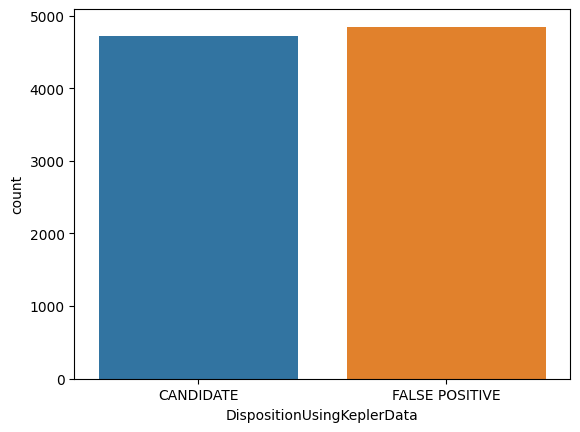

In [32]:
import seaborn as sns
sns.countplot(x = exoplanet_df['DispositionUsingKeplerData'])
print(exoplanet_df['DispositionUsingKeplerData'].value_counts())

ExoplanetArchiveDisposition
FALSE POSITIVE    4839
CONFIRMED         2671
CANDIDATE         2054
Name: count, dtype: int64


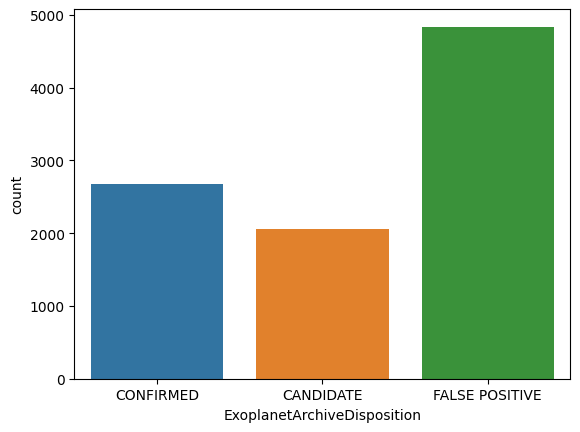

In [33]:
sns.countplot(x= exoplanet_df['ExoplanetArchiveDisposition'])
print(exoplanet_df['ExoplanetArchiveDisposition'].value_counts())

#### Tasks

-  Explore missing values by finding the the precentage of missing values for each column - print as a dataframe
-  Visualise the missing values of the columns with the 5 most percentage of missing value
-  Identify potential outliers of the numeric features. This can be done in many ways but you should probably try to write some kind of script/loop that will iterate through the features and calculate the number of values outside [Q1 - 1.5IQR ; Q3 + 1.5IQR]. Don't remove them just yet but discuss what could be a good approach.
-  Determine what to do with potential outlier: keep, replace or remove

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Making a copy of the data set for Exploratory Data Analysis
eda_df = exoplanet_df.copy()
row_count, col_count = eda_df.shape
print(f'Rows {row_count}, Columns {col_count}')
eda_df.head()

Rows 9564, Columns 49


,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","OrbitalPeriodUpperUnc, days","OrbitalPeriodLowerUnc, days","TransitEpoch, BKJD","TransitEpochUpperUnc, BKJD","TransitEpochLowerUnc, BKJD",ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,"TransitDuration, hrs","TransitDurationUpperUnc, hrs","TransitDurationLowerUnc, hrs","TransitDepth, ppm","TransitDepthUpperUnc, ppm","TransitDepthLowerUnc, ppm","PlanetaryRadius, Earthradii","PlanetaryRadiusUpperUnc, Earthradii","PlanetaryRadiusLowerUnc, Earthradii","EquilibriumTemperature, K","EquilibriumTemperatureUpperUnc, K","EquilibriumTemperatureLowerUnc, K","InsolationFlux, Earthflux","InsolationFluxUpperUnc, Earthflux","InsolationFluxLowerUnc, Earthflux",TransitSignal-to-Noise,TCEPlanetNumber,TCEDeliver,"StellarEffectiveTemperature, K","StellarEffectiveTemperatureUpperUnc, K","StellarEffectiveTemperatureLowerUnc, K","StellarSurfaceGravity, log10(cm/s^2)","StellarSurfaceGravityUpperUnc, log10(cm/s^2)","StellarSurfaceGravityLowerUnc, log10(cm/s^2)","StellarRadius, Solarradii","StellarRadiusUpperUnc, Solarradii","StellarRadiusLowerUnc, Solarradii","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag"
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [35]:
# Getting a feeling for the Dtypes
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   KepID                                                  9564 non-null   int64  
 1   KOIName                                                9564 non-null   object 
 2   KeplerName                                             2673 non-null   object 
 3   ExoplanetArchiveDisposition                            9564 non-null   object 
 4   DispositionUsingKeplerData                             9564 non-null   object 
 5   DispositionScore                                       8054 non-null   float64
 6   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 7   koi_fpflag_ss                                          9564 non-null   int64  
 8   CentroidOffsetFalsePositiveFlag                 

In [36]:
from pandas.io.formats.info import DataFrameInfo
info = DataFrameInfo(data = eda_df)
info_df = pd.DataFrame(
    {'Non-Null Count': info.non_null_counts, 'Dtype': info.dtypes}
)

# Calculating missing data per column. 
info_df['Missing Count'] = row_count - info_df['Non-Null Count']
info_df['Missing Ratio'] = (info_df['Missing Count'] / row_count).astype(float)
# Sorting missing data from highest % to lowest %
# This dataframe also gives us a good overview over how many numerical vs categorical features we have.
info_df.sort_values(by=['Non-Null Count'], ascending=True)

,Non-Null Count,Dtype,Missing Count,Missing Ratio
"EquilibriumTemperatureLowerUnc, K",0,float64,9564,1.000000
"EquilibriumTemperatureUpperUnc, K",0,float64,9564,1.000000
KeplerName,2673,object,6891,0.720514
DispositionScore,8054,float64,1510,0.157884
"StellarEffectiveTemperatureLowerUnc, K",9081,float64,483,0.050502
"StellarRadiusLowerUnc, Solarradii",9096,float64,468,0.048934
"StellarRadiusUpperUnc, Solarradii",9096,float64,468,0.048934
"StellarSurfaceGravityLowerUnc, log10(cm/s^2)",9096,float64,468,0.048934
"StellarSurfaceGravityUpperUnc, log10(cm/s^2)",9096,float64,468,0.048934
"StellarEffectiveTemperatureUpperUnc, K",9096,float64,468,0.048934


In [37]:
# Checking for any duplicated rows
eda_df.loc[eda_df.duplicated()]

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","OrbitalPeriodUpperUnc, days","OrbitalPeriodLowerUnc, days","TransitEpoch, BKJD","TransitEpochUpperUnc, BKJD","TransitEpochLowerUnc, BKJD",ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,"TransitDuration, hrs","TransitDurationUpperUnc, hrs","TransitDurationLowerUnc, hrs","TransitDepth, ppm","TransitDepthUpperUnc, ppm","TransitDepthLowerUnc, ppm","PlanetaryRadius, Earthradii","PlanetaryRadiusUpperUnc, Earthradii","PlanetaryRadiusLowerUnc, Earthradii","EquilibriumTemperature, K","EquilibriumTemperatureUpperUnc, K","EquilibriumTemperatureLowerUnc, K","InsolationFlux, Earthflux","InsolationFluxUpperUnc, Earthflux","InsolationFluxLowerUnc, Earthflux",TransitSignal-to-Noise,TCEPlanetNumber,TCEDeliver,"StellarEffectiveTemperature, K","StellarEffectiveTemperatureUpperUnc, K","StellarEffectiveTemperatureLowerUnc, K","StellarSurfaceGravity, log10(cm/s^2)","StellarSurfaceGravityUpperUnc, log10(cm/s^2)","StellarSurfaceGravityLowerUnc, log10(cm/s^2)","StellarRadius, Solarradii","StellarRadiusUpperUnc, Solarradii","StellarRadiusLowerUnc, Solarradii","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag"


In [38]:
eda_df.describe()

,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","OrbitalPeriodUpperUnc, days","OrbitalPeriodLowerUnc, days","TransitEpoch, BKJD","TransitEpochUpperUnc, BKJD","TransitEpochLowerUnc, BKJD",ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,"TransitDuration, hrs","TransitDurationUpperUnc, hrs","TransitDurationLowerUnc, hrs","TransitDepth, ppm","TransitDepthUpperUnc, ppm","TransitDepthLowerUnc, ppm","PlanetaryRadius, Earthradii","PlanetaryRadiusUpperUnc, Earthradii","PlanetaryRadiusLowerUnc, Earthradii","EquilibriumTemperature, K","EquilibriumTemperatureUpperUnc, K","EquilibriumTemperatureLowerUnc, K","InsolationFlux, Earthflux","InsolationFluxUpperUnc, Earthflux","InsolationFluxLowerUnc, Earthflux",TransitSignal-to-Noise,TCEPlanetNumber,"StellarEffectiveTemperature, K","StellarEffectiveTemperatureUpperUnc, K","StellarEffectiveTemperatureLowerUnc, K","StellarSurfaceGravity, log10(cm/s^2)","StellarSurfaceGravityUpperUnc, log10(cm/s^2)","StellarSurfaceGravityLowerUnc, log10(cm/s^2)","StellarRadius, Solarradii","StellarRadiusUpperUnc, Solarradii","StellarRadiusLowerUnc, Solarradii","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag"
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,9110.000000,9110.000000,9201.000000,9110.000000,9110.000000,9564.000000,9110.000000,9110.000000,9.201000e+03,9110.000000,9110.000000,9201.000000,9201.000000,9201.000000,9201.000000,0.0,0.0,9.243000e+03,9.243000e+03,9.243000e+03,9201.000000,9218.000000,9201.000000,9096.000000,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,166.183251,0.009933,-0.009933,0.735105,1.959861,-0.332557,5.621606,0.339942,-0.339942,2.379134e+04,123.197563,-123.197563,102.891778,17.657684,-33.023314,1085.385828,NaN,NaN,7.745737e+03,3.750698e+03,-4.043522e+03,259.895001,1.243654,5706.823280,144.635554,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008236,0.008236,67.918960,0.023097,0.023097,3.348832,9.421653,1.249828,6.471554,0.669823,0.669823,8.224268e+04,4112.615230,4112.615230,3077.639126,391.138501,1193.519910,856.351161,NaN,NaN,1.592047e+05,5.504421e+04,8.838831e+04,795.806615,0.664573,796.857947,47.052305,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,120.515914,0.000009,-0.569000,0.000000,0.000000,-59.320000,0.052000,0.000000,-20.200000,0.000000e+00,0.000000,-388600.000000,0.080000,0.000000,-77180.000000,25.000000,NaN,NaN,0.000000e+00,0.000000e+00,-5.600031e+06,0.000000,1.000000,2661.000000,0.000000,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,0.001240,-0.010500,0.197000,0.040000,-0.445000,2.437750,0.050800,-0.350000,1.599000e+02,9.600000,-49.500000,1.400000,0.230000,-1.940000,539.000000,NaN,NaN,2.015000e+01,9.190000e+00,-2.873100e+02,12.000000,1.000000,5310.000000,106.000000,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,0.004130,-0.004130,0.537000,0.193000,-0.207000,3.792600,0.142000,-0.142000,4.211000e+02,20.750000,-20.750000,2.390000,0.520000,-0.300000,878.000000,NaN,NaN,1.416000e+02,7.283000e+01,-4.026000e+01,23.000000,1.000000,5767.000000,157.000000,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261

In [39]:
# Drop the label
eda_feature_df = eda_df.drop("DispositionUsingKeplerData", axis=1)

# Find all features with numerical type
# We only select the series that have dtype of float64, since the features that have dtype of int
# are the flag features + id feature
eda_numerical_features = eda_feature_df.select_dtypes(include=['float64'])
eda_numerical_features


,DispositionScore,"OrbitalPeriod, days","OrbitalPeriodUpperUnc, days","OrbitalPeriodLowerUnc, days","TransitEpoch, BKJD","TransitEpochUpperUnc, BKJD","TransitEpochLowerUnc, BKJD",ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,"TransitDuration, hrs","TransitDurationUpperUnc, hrs","TransitDurationLowerUnc, hrs","TransitDepth, ppm","TransitDepthUpperUnc, ppm","TransitDepthLowerUnc, ppm","PlanetaryRadius, Earthradii","PlanetaryRadiusUpperUnc, Earthradii","PlanetaryRadiusLowerUnc, Earthradii","EquilibriumTemperature, K","EquilibriumTemperatureUpperUnc, K","EquilibriumTemperatureLowerUnc, K","InsolationFlux, Earthflux","InsolationFluxUpperUnc, Earthflux","InsolationFluxLowerUnc, Earthflux",TransitSignal-to-Noise,TCEPlanetNumber,"StellarEffectiveTemperature, K","StellarEffectiveTemperatureUpperUnc, K","StellarEffectiveTemperatureLowerUnc, K","StellarSurfaceGravity, log10(cm/s^2)","StellarSurfaceGravityUpperUnc, log10(cm/s^2)","StellarSurfaceGravityLowerUnc, log10(cm/s^2)","StellarRadius, Solarradii","StellarRadiusUpperUnc, Solarradii","StellarRadiusLowerUnc, Solarradii","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag"
0,1.000,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0.969,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,0.000,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,0.000,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,1.000,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,0.000,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,NaN,NaN,4500.53,3406.38,-1175.26,453.3,1.0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,0.497,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,NaN,NaN,1585.81,1537.86,-502.22,10.6,1.0,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,0.021,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,NaN,NaN,5713.41,5675.74,-1836.94,12.3,1.0,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,0.092,333.486169,4.235000e-03,-4.235000e-03,153.615010,0.005070,-0.005070,0.214,0.255,-0.214,3.19900,0.22900,-0.22900,639.1,52.7,-52.7,19.30,0.55,-4.68,557.0,NaN,NaN,22.68,2.07,-10.95,14.0,1.0,4989.0,39.0,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [40]:
# Defining function to detect outliers
def get_outliers(feature, df: pd.DataFrame, threshold=1.5) -> np.array: 
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - (threshold * iqr)
    upper_bound = q3 + (threshold * iqr)
    return np.where(~df[feature].between(lower_bound, upper_bound), 1, 0)

In [41]:
# Finding outliers in the data set
# We flag outliers by creating a flag column for each numerical feature. 1 is outlier, 0 if not outlier.
outlier_flag_names = list(map(lambda x: f'{x}_is_outlier', eda_numerical_features.columns.values))
for feature in eda_numerical_features:
    eda_numerical_features[f'{feature}_is_outlier'] = get_outliers(feature, eda_numerical_features)
for feature in outlier_flag_names:
    print(f'{eda_numerical_features[feature].value_counts()}\n') 

DispositionScore_is_outlier
0    8054
1    1510
Name: count, dtype: int64

OrbitalPeriod, days_is_outlier
0    7997
1    1567
Name: count, dtype: int64

OrbitalPeriodUpperUnc, days_is_outlier
0    7460
1    2104
Name: count, dtype: int64

OrbitalPeriodLowerUnc, days_is_outlier
0    7460
1    2104
Name: count, dtype: int64

TransitEpoch, BKJD_is_outlier
0    8518
1    1046
Name: count, dtype: int64

TransitEpochUpperUnc, BKJD_is_outlier
0    8272
1    1292
Name: count, dtype: int64

TransitEpochLowerUnc, BKJD_is_outlier
0    8272
1    1292
Name: count, dtype: int64

ImpactParamete_is_outlier
0    9119
1     445
Name: count, dtype: int64

ImpactParameterUpperUnc_is_outlier
0    8374
1    1190
Name: count, dtype: int64

ImpactParameterLowerUnc_is_outlier
0    8990
1     574
Name: count, dtype: int64

TransitDuration, hrs_is_outlier
0    8695
1     869
Name: count, dtype: int64

TransitDurationUpperUnc, hrs_is_outlier
0    8180
1    1384
Name: count, dtype: int64

TransitDurationLowerUnc, 

We have 3 choices for the outliers: replace them, keep them or delete them. 

## Delete them 
If the outliers are not caused by bad instrumentation or errors in the data collection, then removing these outliers will remove training data reducing our data set that our model can train on. 


## Replacing them 
We can also choose to replace the outliers with the median of that feature, or maybe replace the outliers with the upper and lower bound, i.e. Q3 + 1.5 * IQR and Q1 - 1.5 * IQR.

## Keep them
If the outliers are natural, it would make sense to keep them for now. 

We choose to keep the outliers, since we are not sure about what significance the different features have on the model yet. If the model have bad performance, we can reevaluate what we want to do with the outliers. 

### 2. Feature Engineering

#### Tasks

-  Based only on the analysis above, you should be able to remove some columns (two of the columns will have 100% missing values). Remove these columns.
-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.) - there should be 4
-  Remove rows with missing values, NaNs, nulls and/or infinite values - if you want, you may choose to impute instead
-  If you you chose to remove or replace outliers do this now. If you chose to keep, move on
-  Create a correlation matrix and discuss (use only numeric columns, perhaps make an extra dataset just with numeric values) - drop appropriate columns
-  The values of `ExoplanetArchiveDisposition` and `ExoplanetArchiveDisposition` are categorical and if they are to act like labels, you should change them. Change them as follows: 'FALSE POSITIVE' values is assigned a numerical value of `0`, 'CANDIDATE' assigned `1`, and 'CONFIRMED' a `2`. Same assignment in both features. The easiest way is to create two new features, call them `KeplerDispositionStatus` and `ArchiveDispositionStatus`, and then drop the originalæ features. It will look something like this (the last couple of columns in the new dataframe):

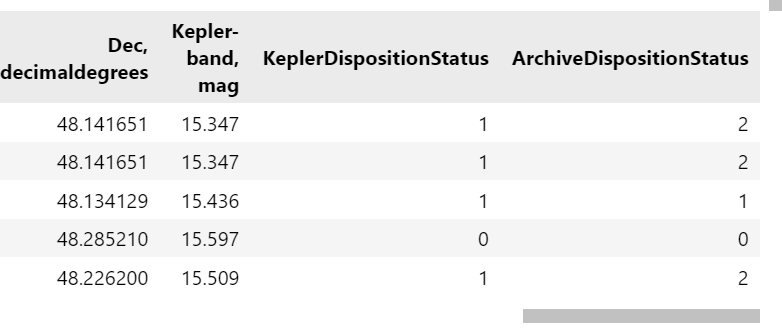

In [42]:
exoplanet_df_copy = exoplanet_df.copy()

In [43]:
labels= exoplanet_df_copy[['DispositionUsingKeplerData', 'ExoplanetArchiveDisposition']]
features= exoplanet_df_copy.drop(columns=['DispositionUsingKeplerData', 'ExoplanetArchiveDisposition'], axis=1, inplace=False)

features_to_remove = info_df[info_df['Missing Ratio'] == 1].index.values.tolist()
features_to_remove


['EquilibriumTemperatureUpperUnc, K', 'EquilibriumTemperatureLowerUnc, K']

In [44]:
features = features.drop(columns=features_to_remove, axis=1, inplace=False)
exoplanet_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   KepID                                                  9564 non-null   int64  
 1   KOIName                                                9564 non-null   object 
 2   KeplerName                                             2673 non-null   object 
 3   ExoplanetArchiveDisposition                            9564 non-null   object 
 4   DispositionUsingKeplerData                             9564 non-null   object 
 5   DispositionScore                                       8054 non-null   float64
 6   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 7   koi_fpflag_ss                                          9564 non-null   int64  
 8   CentroidOffsetFalsePositiveFlag                 

In [45]:
# We are removing obvious features that should not be in the model - ID's, names etc.
features = features.drop(columns=['KepID', 'KOIName', 'KeplerName', 'TCEPlanetNumber'])
features

,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","OrbitalPeriodUpperUnc, days","OrbitalPeriodLowerUnc, days","TransitEpoch, BKJD","TransitEpochUpperUnc, BKJD","TransitEpochLowerUnc, BKJD",ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,"TransitDuration, hrs","TransitDurationUpperUnc, hrs","TransitDurationLowerUnc, hrs","TransitDepth, ppm","TransitDepthUpperUnc, ppm","TransitDepthLowerUnc, ppm","PlanetaryRadius, Earthradii","PlanetaryRadiusUpperUnc, Earthradii","PlanetaryRadiusLowerUnc, Earthradii","EquilibriumTemperature, K","InsolationFlux, Earthflux","InsolationFluxUpperUnc, Earthflux","InsolationFluxLowerUnc, Earthflux",TransitSignal-to-Noise,TCEPlanetNumber,TCEDeliver,"StellarEffectiveTemperature, K","StellarEffectiveTemperatureUpperUnc, K","StellarEffectiveTemperatureLowerUnc, K","StellarSurfaceGravity, log10(cm/s^2)","StellarSurfaceGravityUpperUnc, log10(cm/s^2)","StellarSurfaceGravityLowerUnc, log10(cm/s^2)","StellarRadius, Solarradii","StellarRadiusUpperUnc, Solarradii","StellarRadiusLowerUnc, Solarradii","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag"
0,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,4500.53,3406.38,-1175.26,453.3,1.0,q1_q17_dr25_tce,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,1585.81,1537.86,-502.22,10.6,1.0,q1_q17_dr25_tce,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,0.021,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,5713.41,5675.74,-1836.94,12.3,1.0,q1_q17_dr25_tce,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,0.092,0,0,0,0,333.486169,4.235000e-03,-4.235000e-03,153.615010,0.005070,-0.005070,0.214,0.255,-0.214,3.19900,0.22900,-0.22900,639.1,52.7,-52.7,19.30,0.55,-4.68,557.0,22.68,2.07,-10.95,14.0,1.0,q1_q17_dr2

In [46]:
features['NotTransit-LikeFalsePositiveFlag'].value_counts()

NotTransit-LikeFalsePositiveFlag
0      8033
1      1530
465       1
Name: count, dtype: int64

In [47]:
info_df.sort_values(by='Missing Ratio', ascending=False)
# Dropping all rows containing a null or NaN
features = features[~(features.isnull().any(axis=1) | features.isna().any(axis=1))]

In [48]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7803 entries, 0 to 9563
Data columns (total 42 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   DispositionScore                                       7803 non-null   float64
 1   NotTransit-LikeFalsePositiveFlag                       7803 non-null   int64  
 2   koi_fpflag_ss                                          7803 non-null   int64  
 3   CentroidOffsetFalsePositiveFlag                        7803 non-null   int64  
 4   EphemerisMatchIndicatesContaminationFalsePositiveFlag  7803 non-null   int64  
 5   OrbitalPeriod, days                                    7803 non-null   float64
 6   OrbitalPeriodUpperUnc, days                            7803 non-null   float64
 7   OrbitalPeriodLowerUnc, days                            7803 non-null   float64
 8   TransitEpoch, BKJD                                   

In [49]:
# Dropping categorical feature before creating correlation matrix
corr_df = features.drop('TCEDeliver', axis=1, inplace=False)
corr_df

,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","OrbitalPeriodUpperUnc, days","OrbitalPeriodLowerUnc, days","TransitEpoch, BKJD","TransitEpochUpperUnc, BKJD","TransitEpochLowerUnc, BKJD",ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,"TransitDuration, hrs","TransitDurationUpperUnc, hrs","TransitDurationLowerUnc, hrs","TransitDepth, ppm","TransitDepthUpperUnc, ppm","TransitDepthLowerUnc, ppm","PlanetaryRadius, Earthradii","PlanetaryRadiusUpperUnc, Earthradii","PlanetaryRadiusLowerUnc, Earthradii","EquilibriumTemperature, K","InsolationFlux, Earthflux","InsolationFluxUpperUnc, Earthflux","InsolationFluxLowerUnc, Earthflux",TransitSignal-to-Noise,TCEPlanetNumber,"StellarEffectiveTemperature, K","StellarEffectiveTemperatureUpperUnc, K","StellarEffectiveTemperatureLowerUnc, K","StellarSurfaceGravity, log10(cm/s^2)","StellarSurfaceGravityUpperUnc, log10(cm/s^2)","StellarSurfaceGravityLowerUnc, log10(cm/s^2)","StellarRadius, Solarradii","StellarRadiusUpperUnc, Solarradii","StellarRadiusLowerUnc, Solarradii","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag"
0,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,4500.53,3406.38,-1175.26,453.3,1.0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,1585.81,1537.86,-502.22,10.6,1.0,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,0.021,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,5713.41,5675.74,-1836.94,12.3,1.0,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,0.092,0,0,0,0,333.486169,4.235000e-03,-4.235000e-03,153.615010,0.005070,-0.005070,0.214,0.255,-0.214,3.19900,0.22900,-0.22900,639.1,52.7,-52.7,19.30,0.55,-4.68,557.0,22.68,2.07,-10.95,14.0,1.0,4989.0,39.0,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


<Axes: >

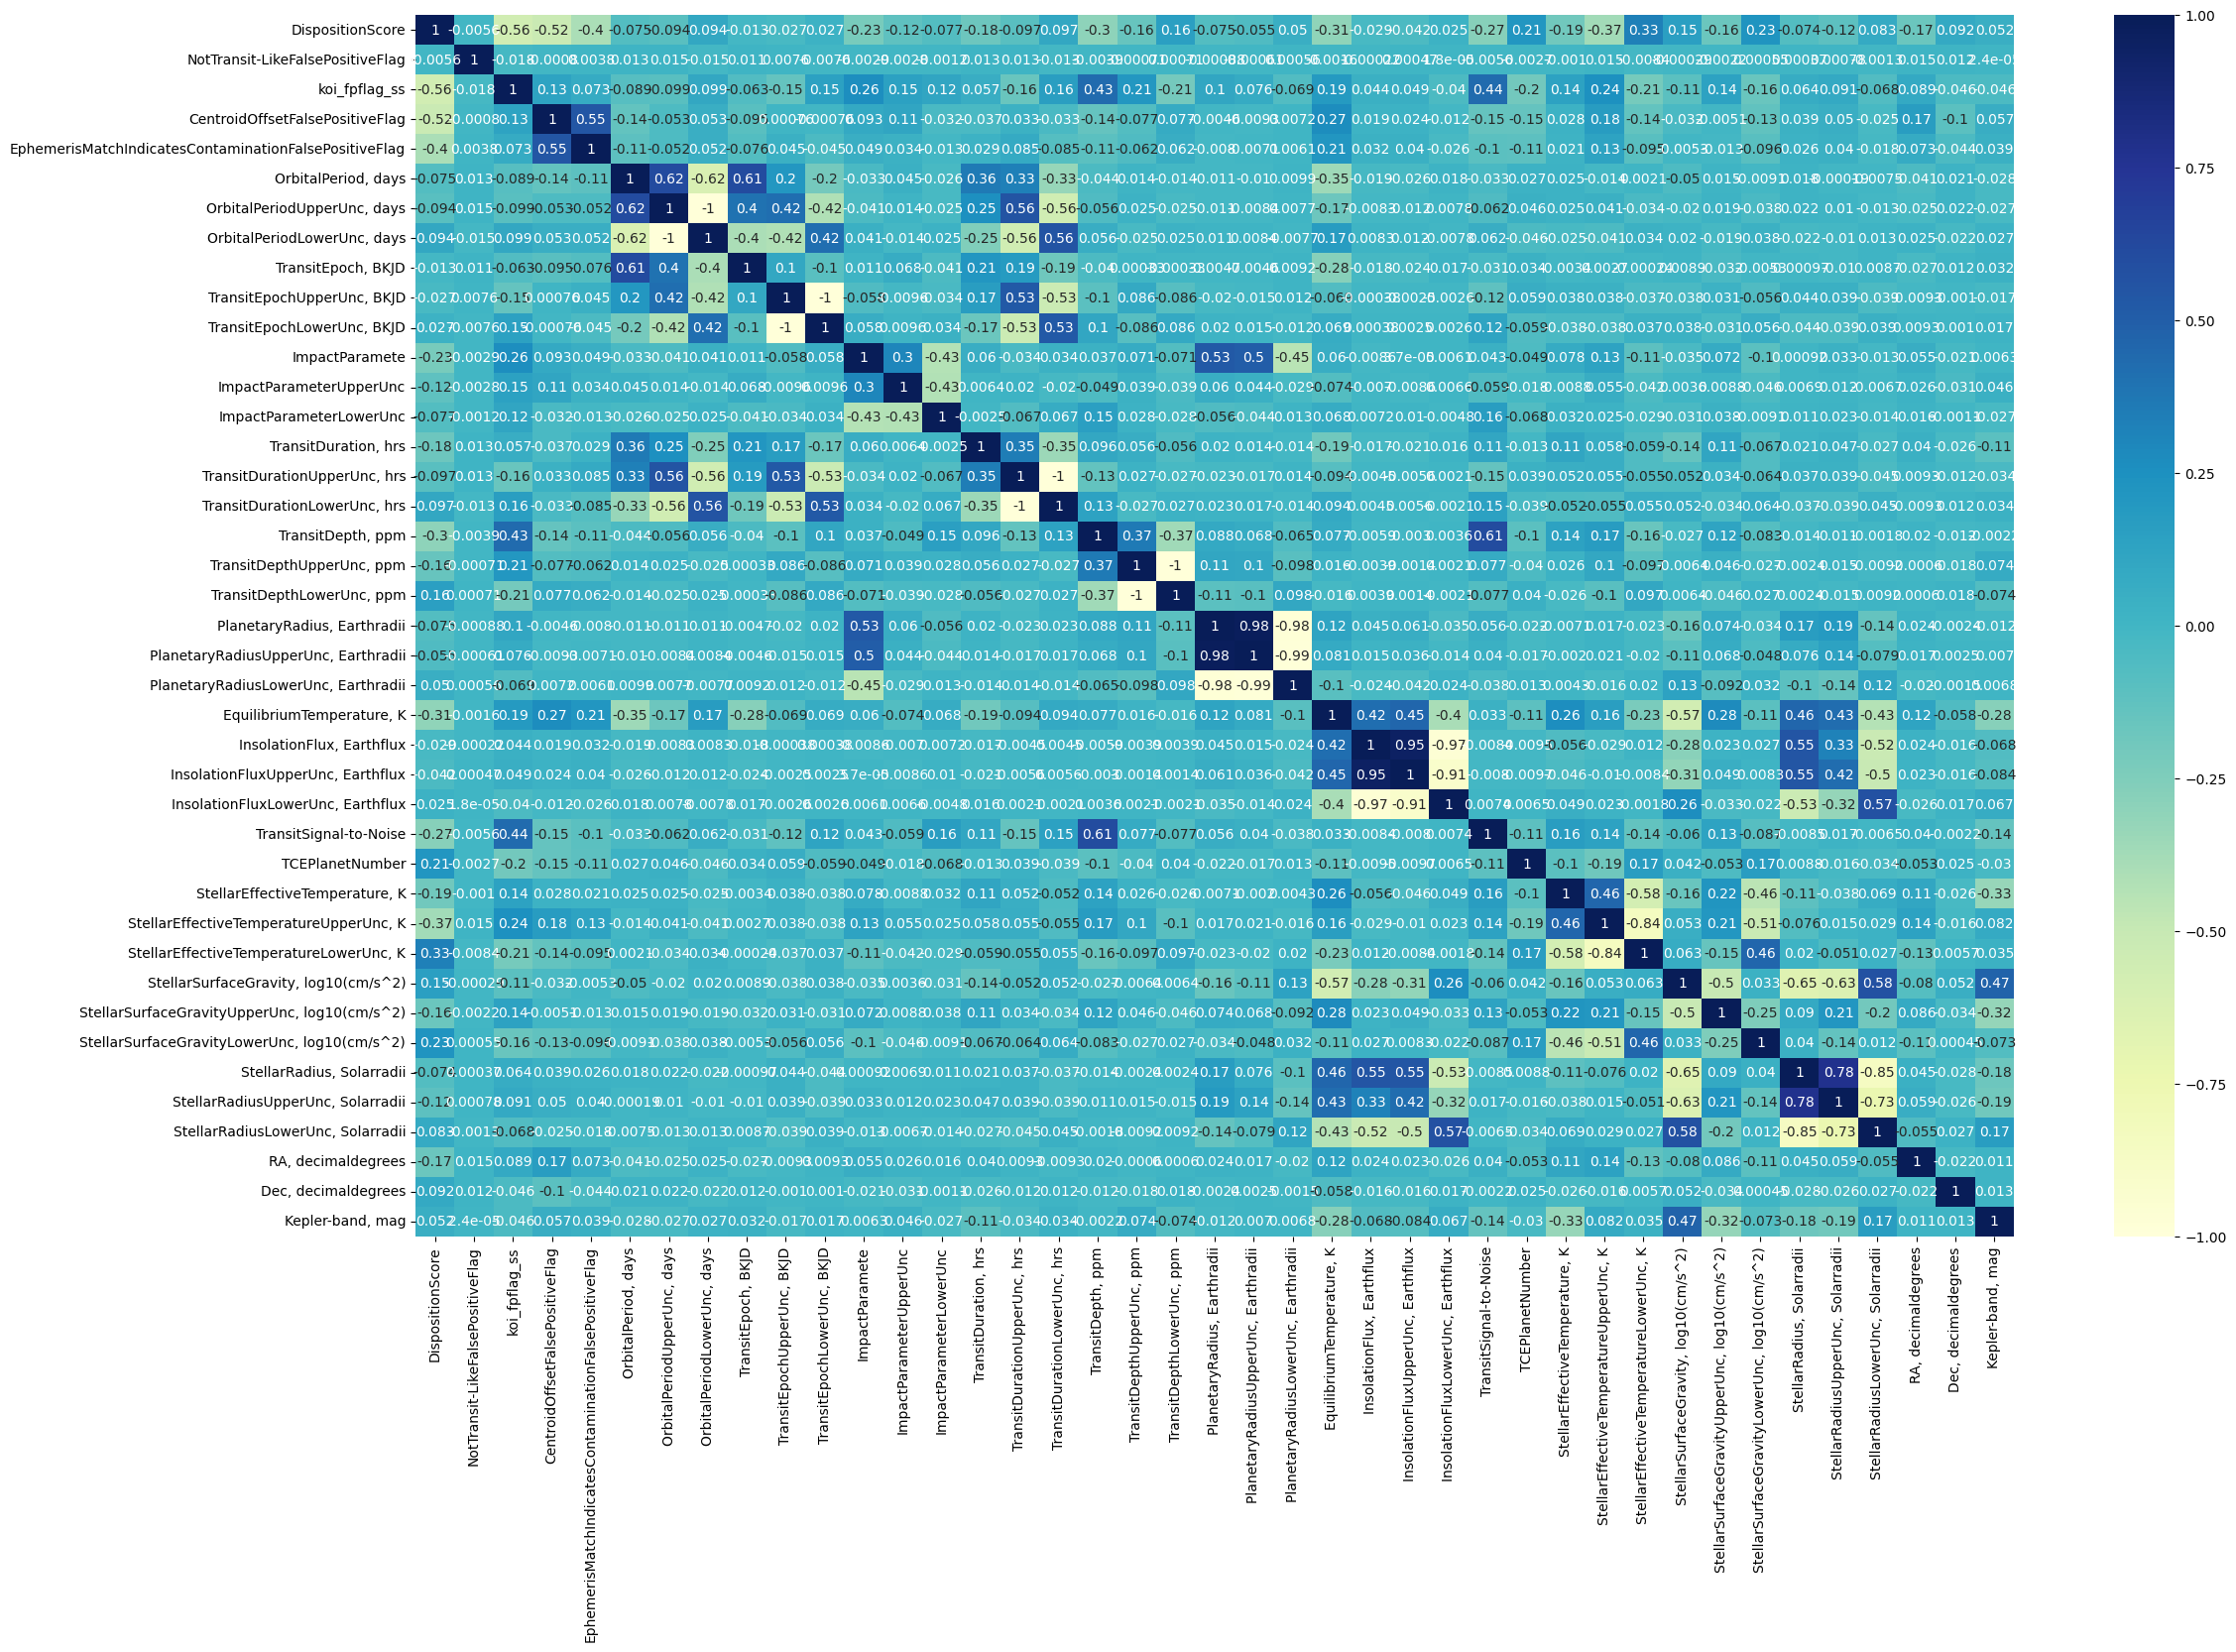

In [50]:
plt.figure(figsize=(26,16))
sns.heatmap(data=corr_df.corr(), annot=True, cmap='YlGnBu')



In [51]:
#  We are removing highly correlated features. Our threshold is < -0.7 or > 0.7
features = features[['DispositionScore', 'NotTransit-LikeFalsePositiveFlag', 'koi_fpflag_ss',
       'CentroidOffsetFalsePositiveFlag',
       'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
       'OrbitalPeriod, days', 'OrbitalPeriodUpperUnc, days',
       'TransitEpoch, BKJD',
       'TransitEpochUpperUnc, BKJD', 
       'ImpactParamete', 'ImpactParameterUpperUnc', 'ImpactParameterLowerUnc',
       'TransitDuration, hrs', 'TransitDurationUpperUnc, hrs',
       'TransitDepth, ppm',
       'TransitDepthUpperUnc, ppm', 
       'PlanetaryRadius, Earthradii', 
       'EquilibriumTemperature, K',
       'InsolationFlux, Earthflux',
       'TransitSignal-to-Noise',
       'TCEPlanetNumber', 'TCEDeliver', 'StellarEffectiveTemperature, K',
       'StellarEffectiveTemperatureUpperUnc, K',
       'StellarSurfaceGravity, log10(cm/s^2)',
       'StellarSurfaceGravityUpperUnc, log10(cm/s^2)',
       'StellarSurfaceGravityLowerUnc, log10(cm/s^2)',
       'StellarRadius, Solarradii',
       'RA, decimaldegrees',
       'Dec, decimaldegrees', 'Kepler-band, mag']]
features

,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","OrbitalPeriodUpperUnc, days","TransitEpoch, BKJD","TransitEpochUpperUnc, BKJD",ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,"TransitDuration, hrs","TransitDurationUpperUnc, hrs","TransitDepth, ppm","TransitDepthUpperUnc, ppm","PlanetaryRadius, Earthradii","EquilibriumTemperature, K","InsolationFlux, Earthflux",TransitSignal-to-Noise,TCEPlanetNumber,TCEDeliver,"StellarEffectiveTemperature, K","StellarEffectiveTemperatureUpperUnc, K","StellarSurfaceGravity, log10(cm/s^2)","StellarSurfaceGravityUpperUnc, log10(cm/s^2)","StellarSurfaceGravityLowerUnc, log10(cm/s^2)","StellarRadius, Solarradii","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag"
0,1.000,0,0,0,0,9.488036,2.775000e-05,170.538750,0.002160,0.146,0.318,-0.146,2.95750,0.08190,615.8,19.5,2.26,793.0,93.59,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,4.467,0.064,-0.096,0.927,291.93423,48.141651,15.347
1,0.969,0,0,0,0,54.418383,2.479000e-04,162.513840,0.003520,0.586,0.059,-0.443,4.50700,0.11600,874.8,35.5,2.83,443.0,9.11,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,4.467,0.064,-0.096,0.927,291.93423,48.141651,15.347
2,0.000,0,0,0,0,19.899140,1.494000e-05,175.850252,0.000581,0.969,5.126,-0.077,1.78220,0.03410,10829.0,171.0,14.60,638.0,39.30,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,4.544,0.044,-0.176,0.868,297.00482,48.134129,15.436
3,0.000,0,1,0,0,1.736952,2.630000e-07,170.307565,0.000115,1.276,0.115,-0.092,2.40641,0.00537,8079.2,12.8,33.46,1395.0,891.96,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,4.564,0.053,-0.168,0.791,285.53461,48.285210,15.597
4,1.000,0,0,0,0,2.525592,3.761000e-06,171.595550,0.001130,0.701,0.235,-0.478,1.65450,0.04200,603.3,16.9,2.75,1406.0,926.16,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,4.438,0.070,-0.210,1.046,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,0.000,0,1,1,0,0.527699,1.160000e-07,131.705093,0.000170,1.252,0.051,-0.049,3.22210,0.01740,1579.2,4.6,29.35,2088.0,4500.53,453.3,1.0,q1_q17_dr25_tce,5638.0,139.0,4.529,0.035,-0.196,0.903,297.18875,47.093819,14.082
9560,0.497,0,0,0,0,1.739849,1.780000e-05,133.001270,0.007690,0.043,0.423,-0.043,3.11400,0.22900,48.5,5.4,0.72,1608.0,1585.81,10.6,1.0,q1_q17_dr25_tce,6119.0,165.0,4.444,0.056,-0.224,1.031,286.50937,47.163219,14.757
9561,0.021,0,0,1,0,0.681402,2.434000e-06,132.181750,0.002850,0.147,0.309,-0.147,0.86500,0.16200,103.6,14.7,1.07,2218.0,5713.41,12.3,1.0,q1_q17_dr25_tce,6173.0,193.0,4.447,0.056,-0.224,1.041,294.16489,47.176281,15.385
9562,0.092,0,0,0,0,333.486169,4.235000e-03,153.615010,0.005070,0.214,0.255,-0.214,3.19900,0.22900,639.1,52.7,19.30,557.0,22.68,14.0,1.0,q1_q17_dr25_tce,4989.0,39.0,2.992,0.030,-0.027,7.824,296.76288,47.145142,10.998


In [52]:
# Encode labes as numeric values
labels['KeplerDispositionStatus'] = labels['DispositionUsingKeplerData'].replace(['CANDIDATE', 'FALSE POSITIVE'], [1,0], inplace=False)
labels['ArchiveDispositionStatus'] = labels['ExoplanetArchiveDisposition'].replace(['CANDIDATE', 'FALSE POSITIVE', 'CONFIRMED'], [1, 0, 2], inplace=False)

C:\Users\Lilian Bittar\AppData\Local\Temp\ipykernel_20420\1087131371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['KeplerDispositionStatus'] = labels['DispositionUsingKeplerData'].replace(['CANDIDATE', 'FALSE POSITIVE'], [1,0], inplace=False)
C:\Users\Lilian Bittar\AppData\Local\Temp\ipykernel_20420\1087131371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['ArchiveDispositionStatus'] = labels['ExoplanetArchiveDisposition'].replace(['CANDIDATE', 'FALSE POSITIVE', 'CONFIRMED'], [1, 0

In [53]:
labels = labels.drop(columns=['ArchiveDispositionStatus', 'KeplerDispositionStatus'])

C:\Users\Lilian Bittar\AppData\Local\Temp\ipykernel_20420\638436204.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


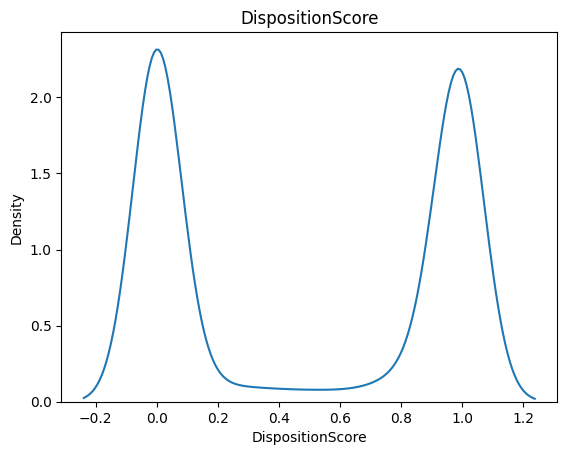

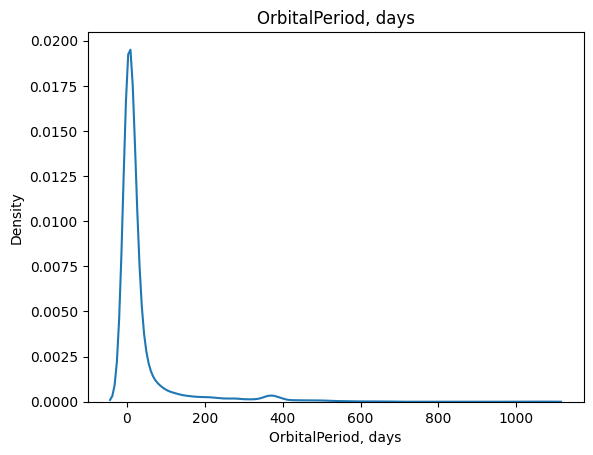

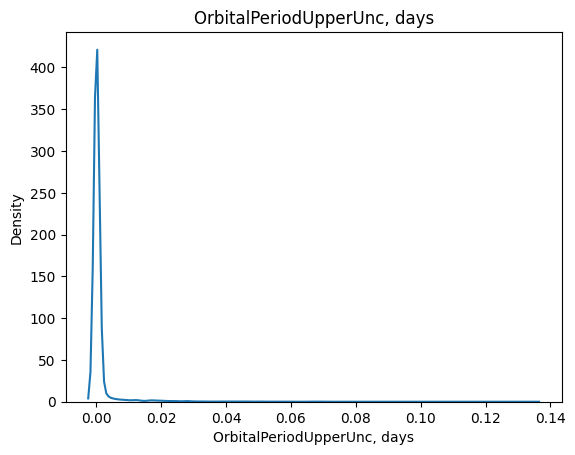

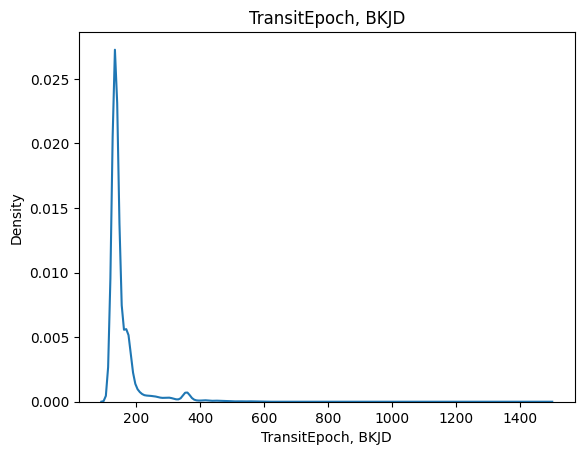

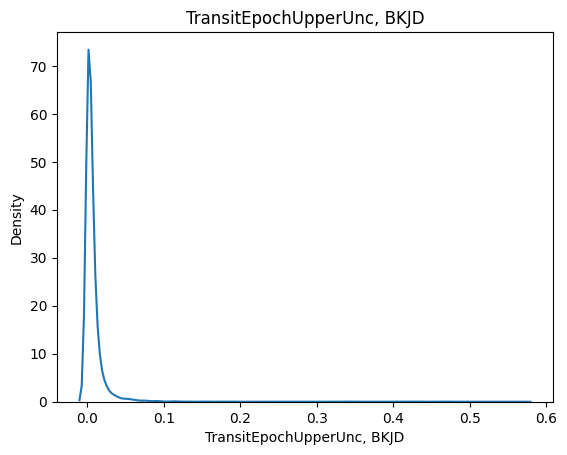

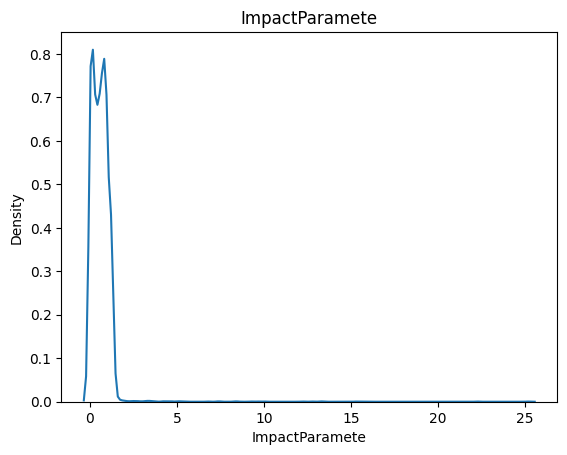

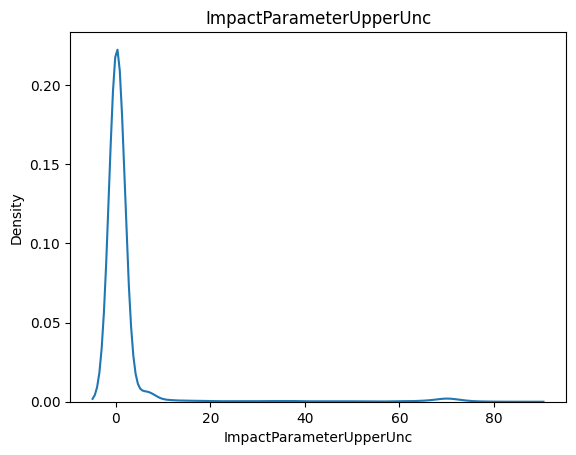

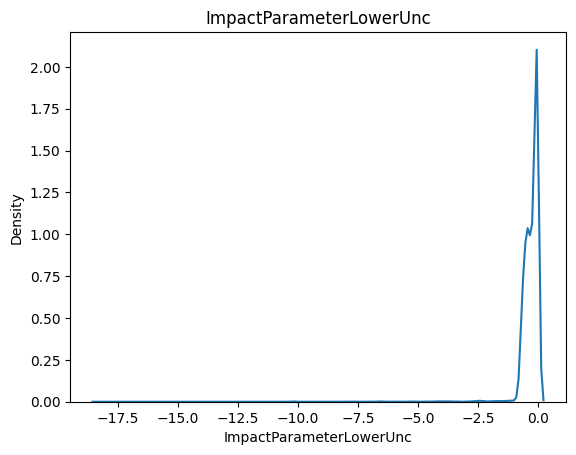

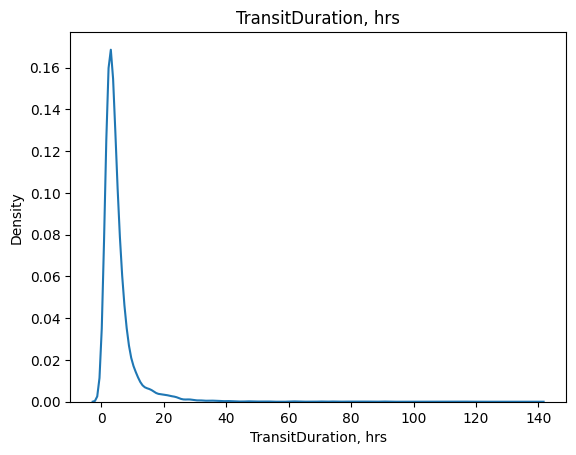

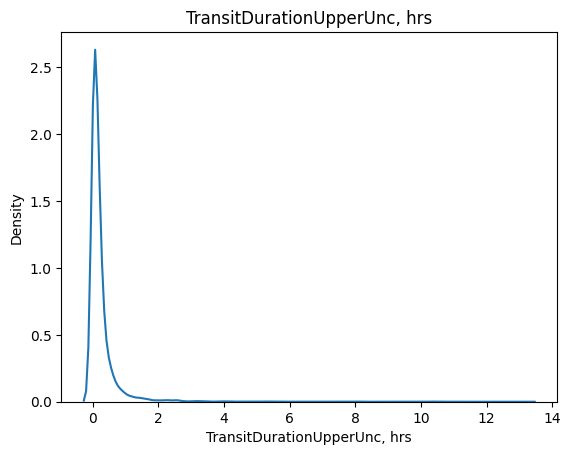

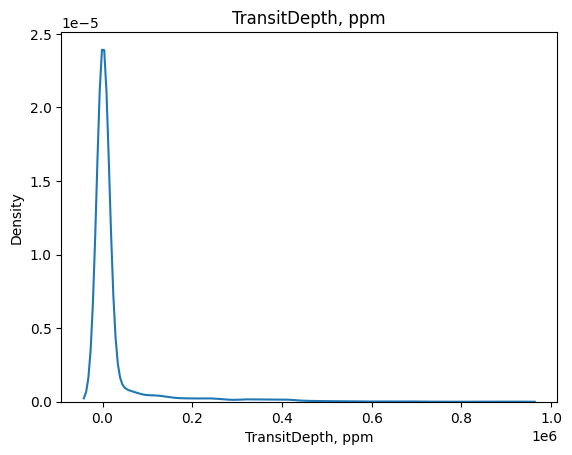

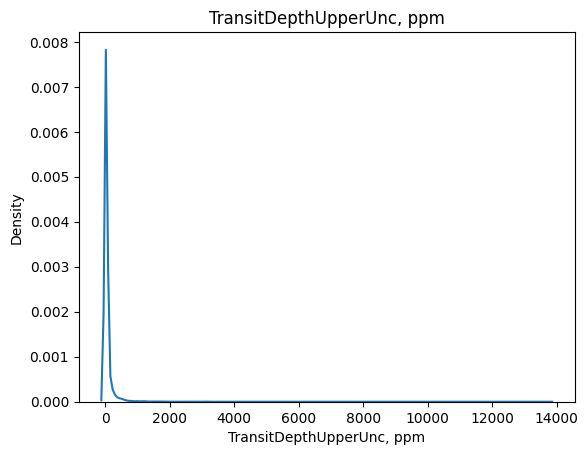

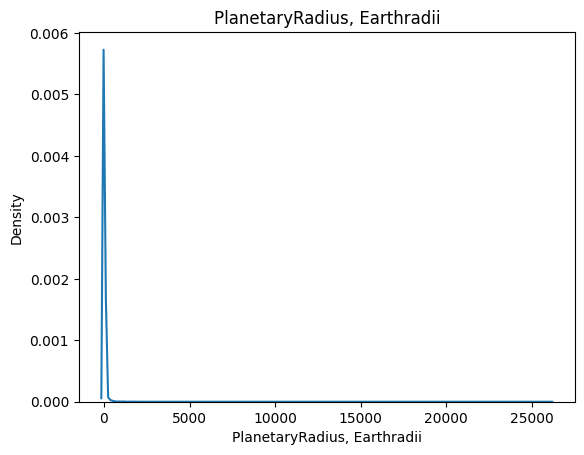

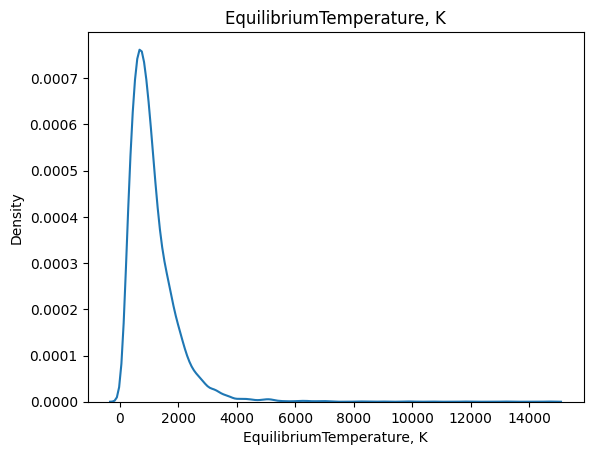

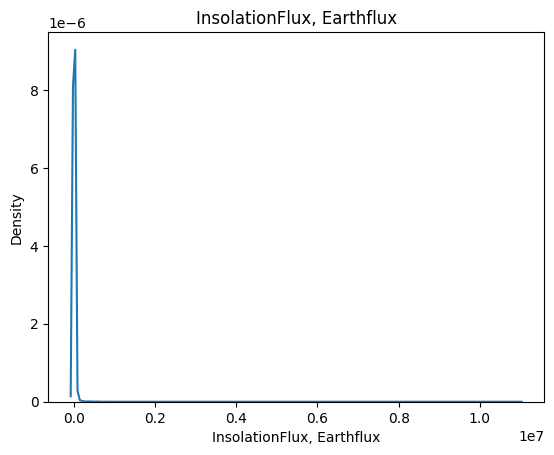

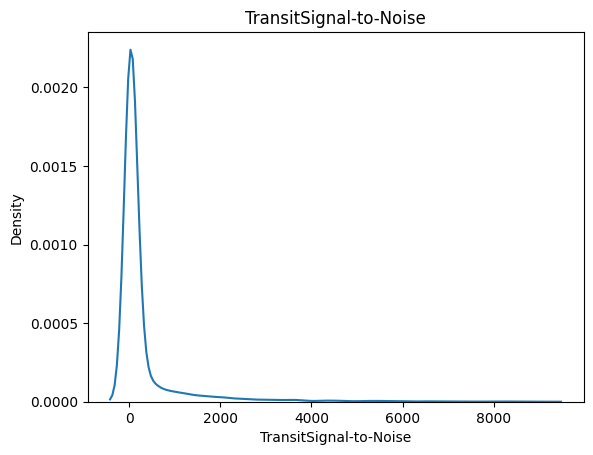

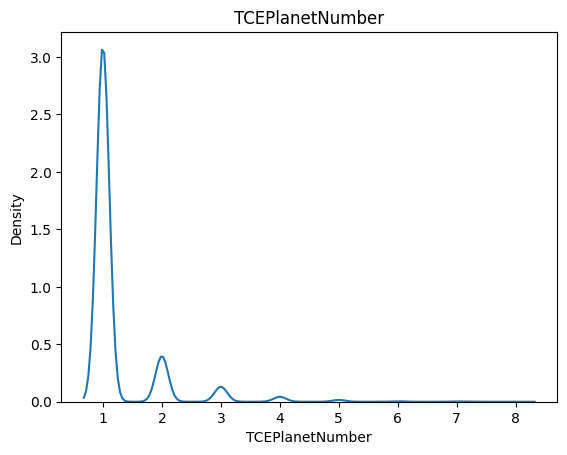

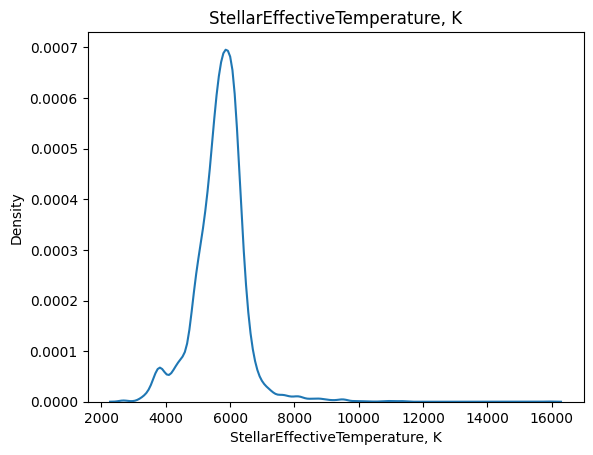

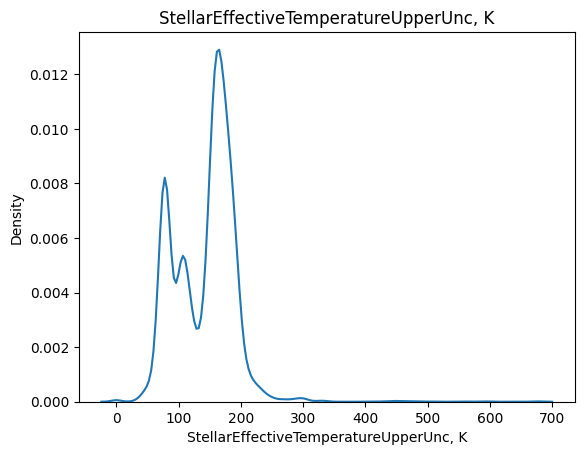

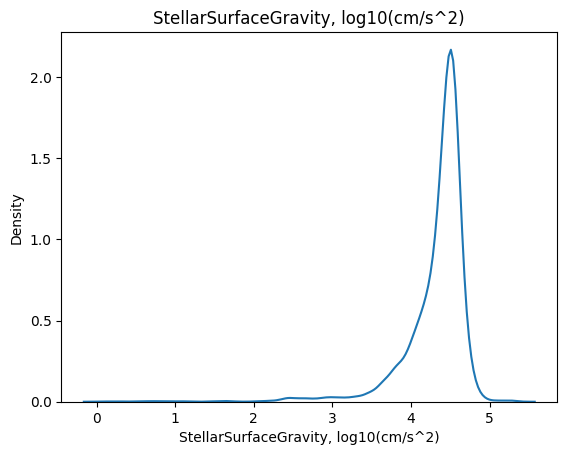

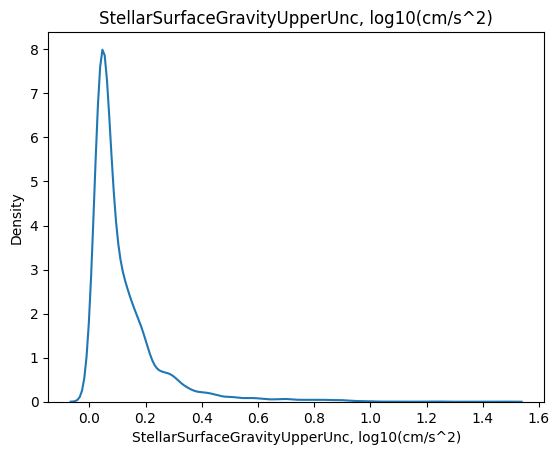

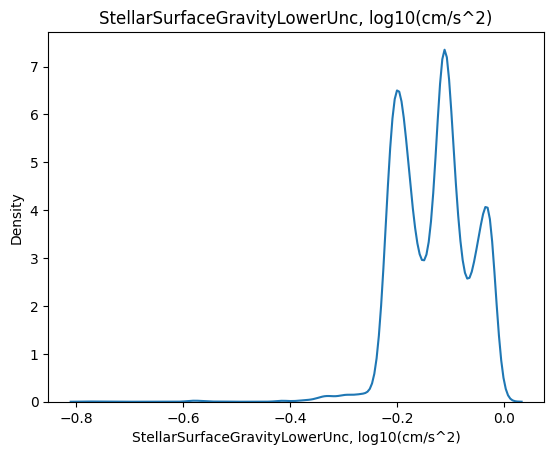

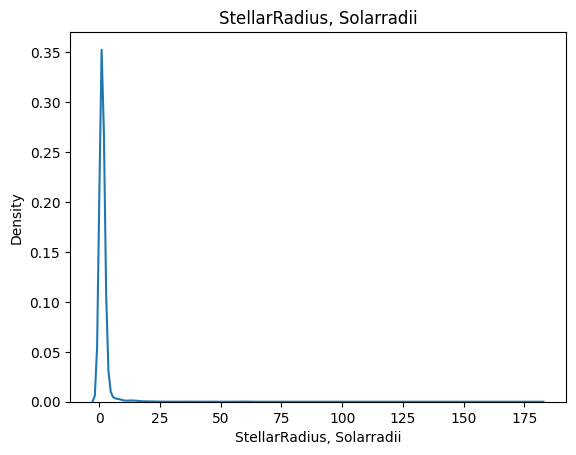

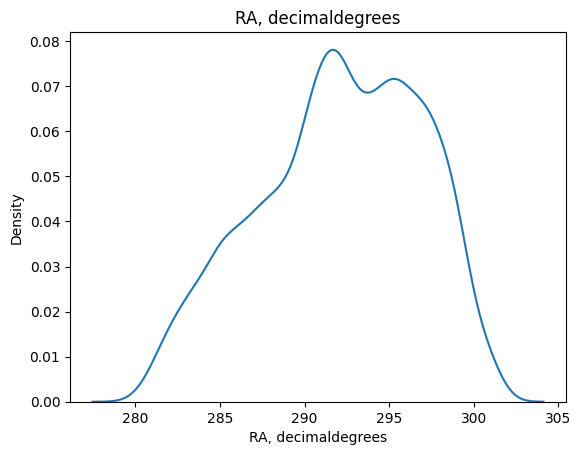

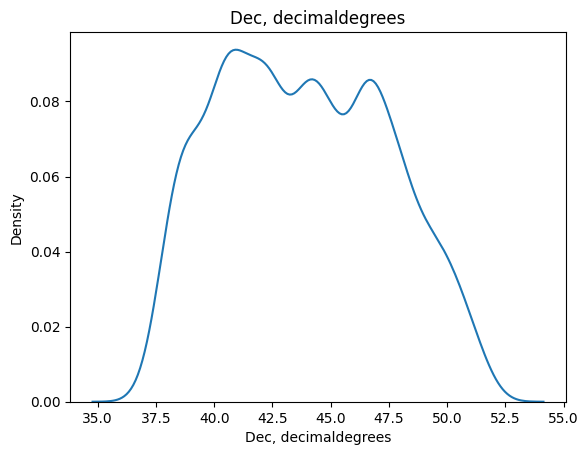

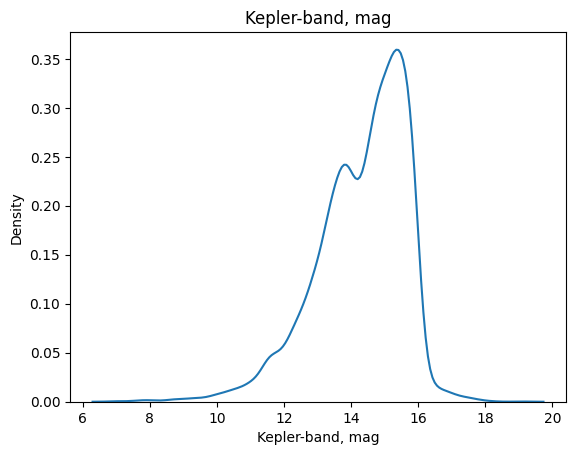

In [55]:
for i in features.select_dtypes(include=["float64"]):
    plt.figure()
    plt.title(f'{i}')
    sns.kdeplot(data=features[i])

C:\Users\Lilian Bittar\AppData\Local\Temp\ipykernel_20420\2615929821.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


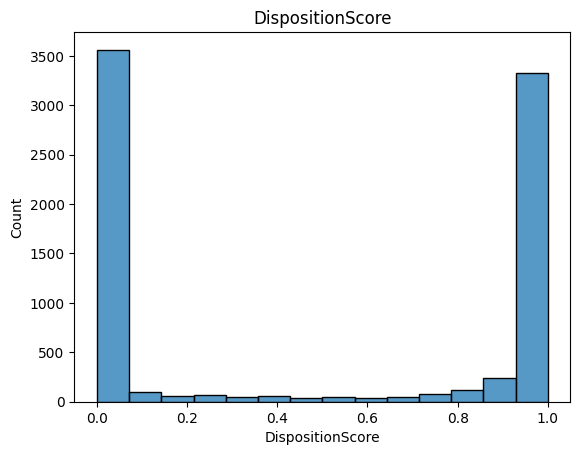

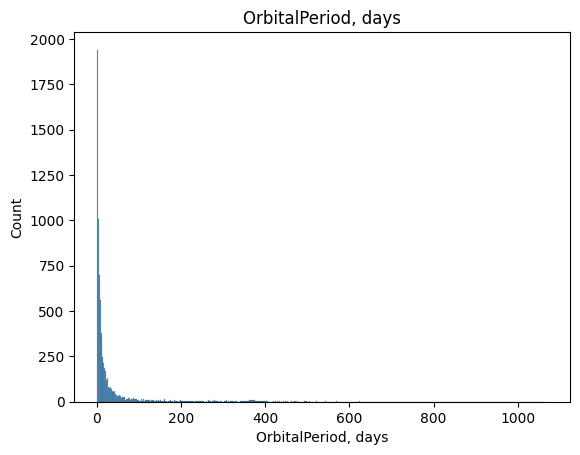

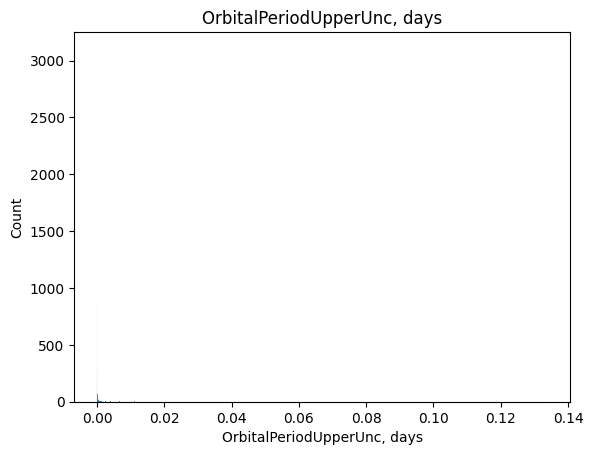

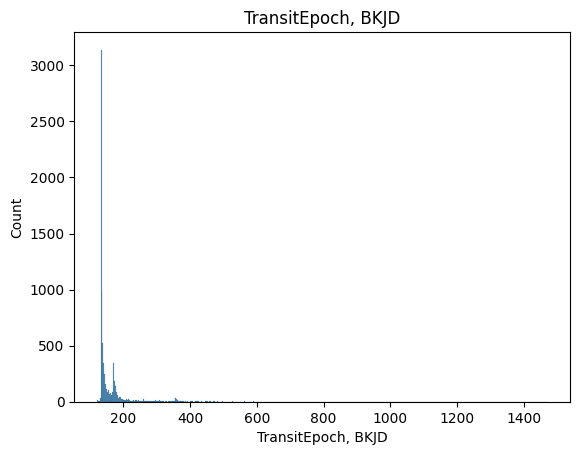

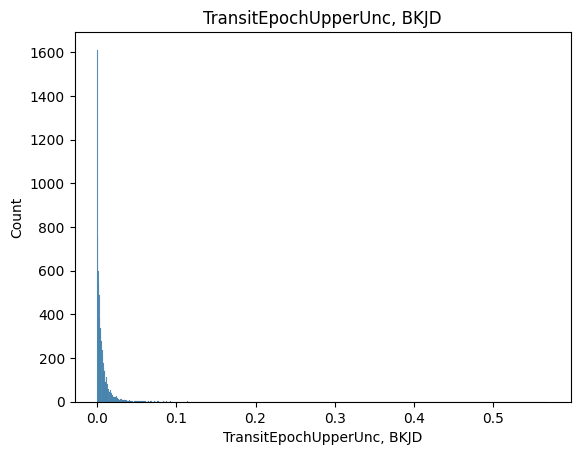

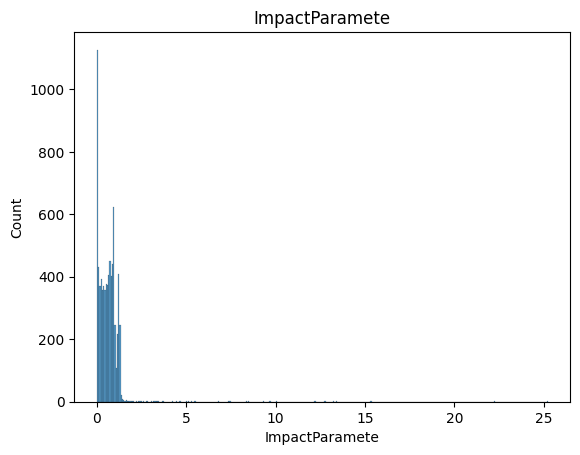

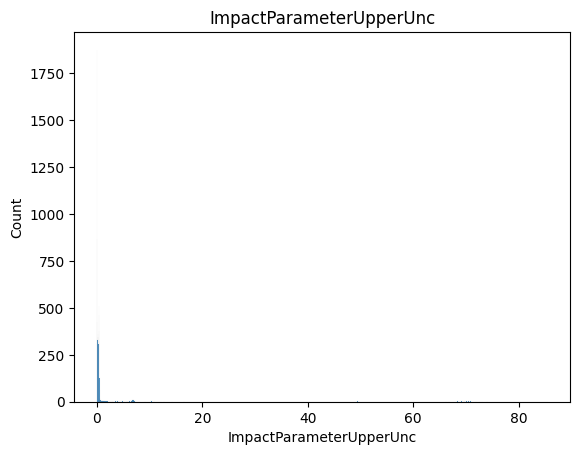

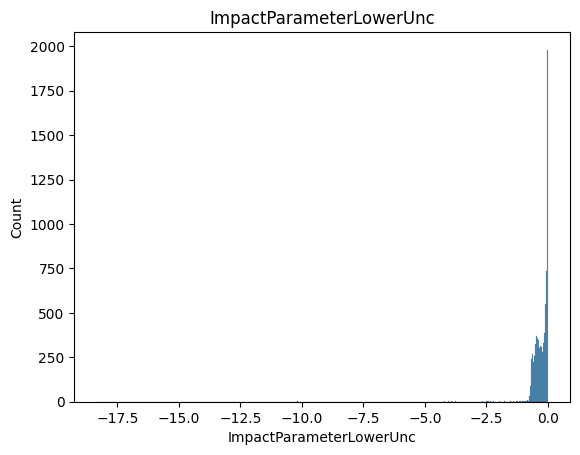

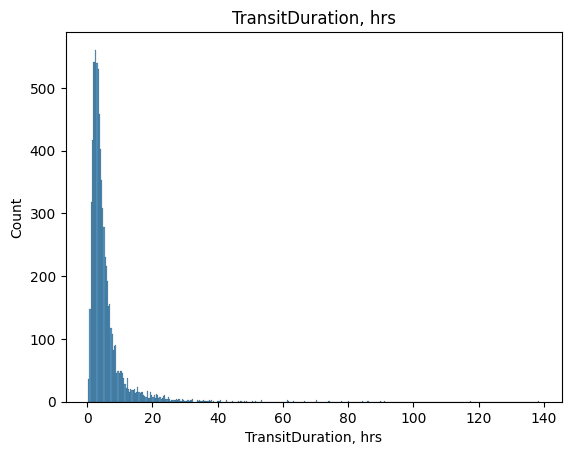

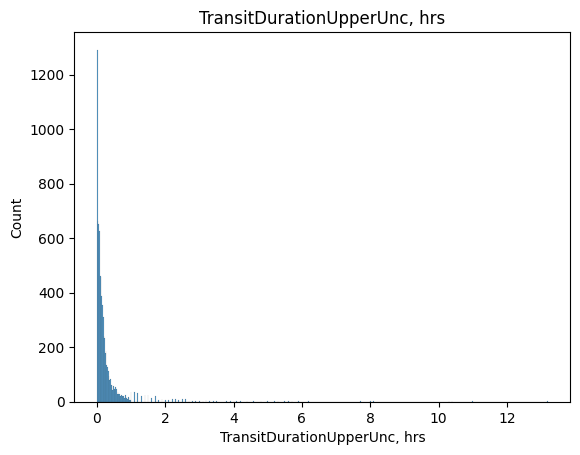

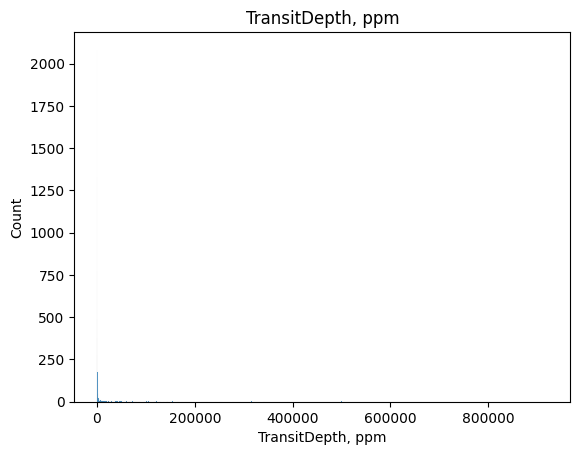

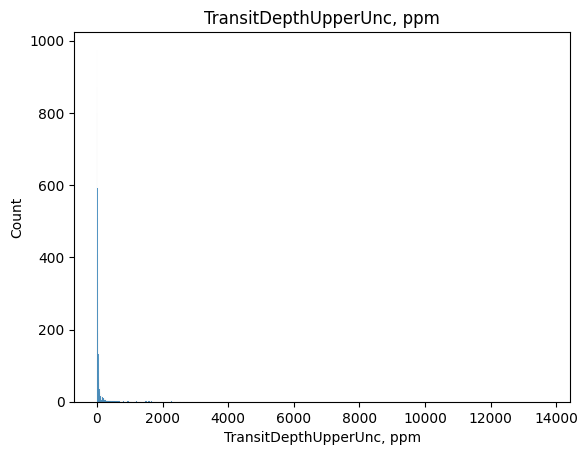

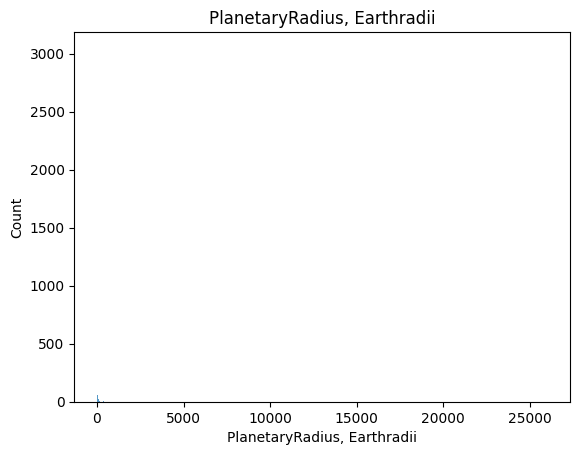

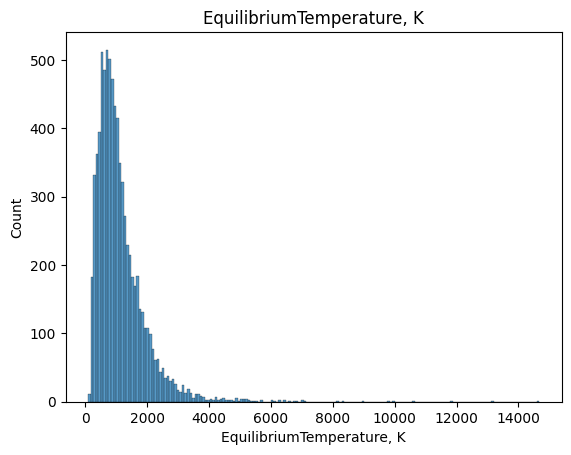

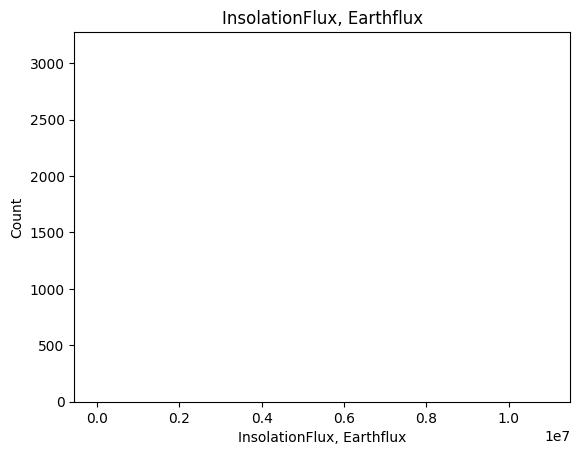

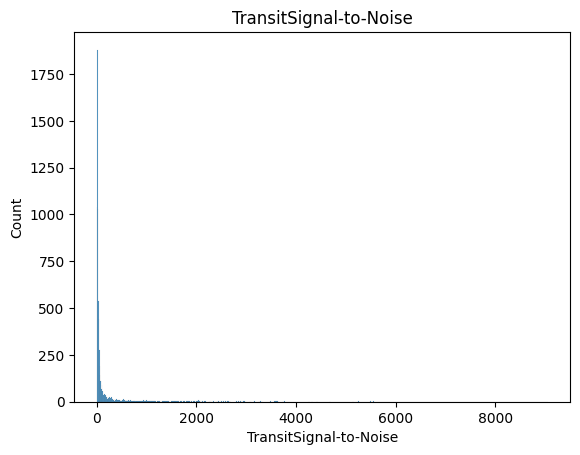

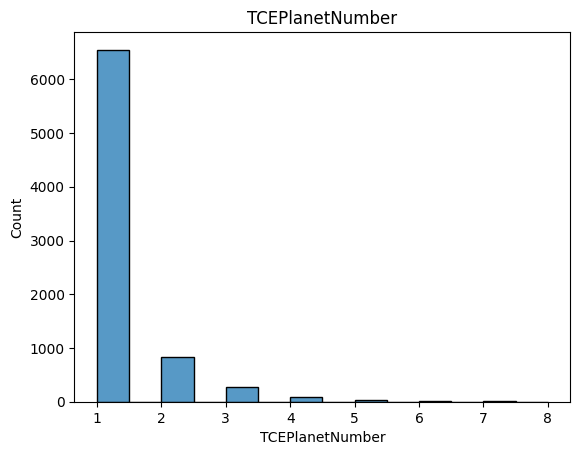

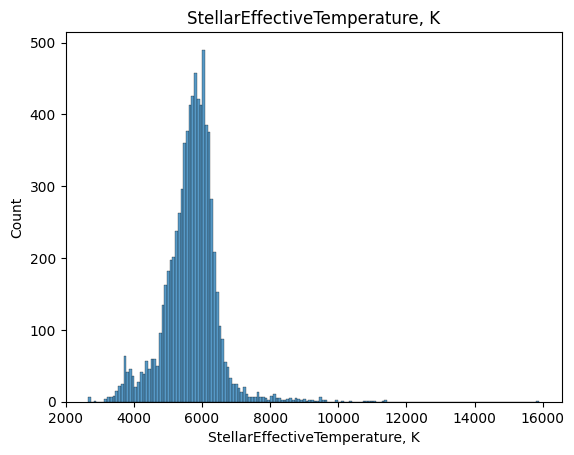

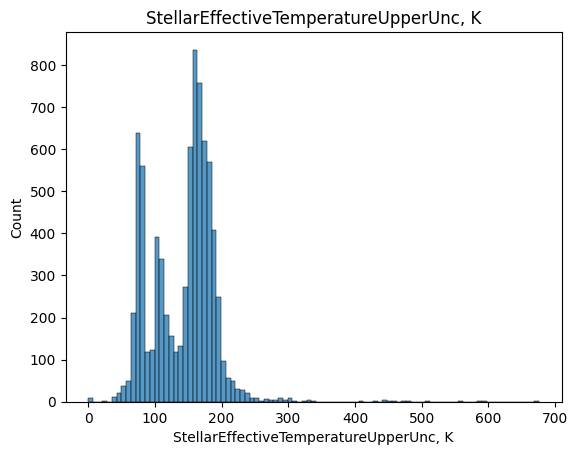

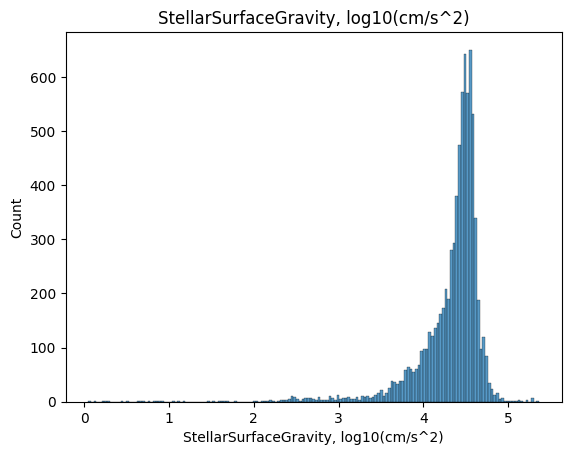

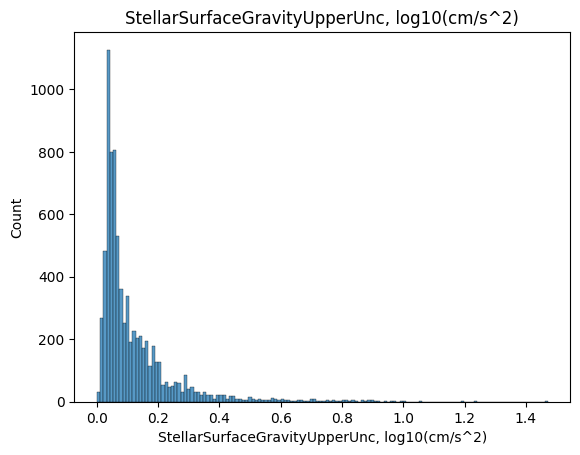

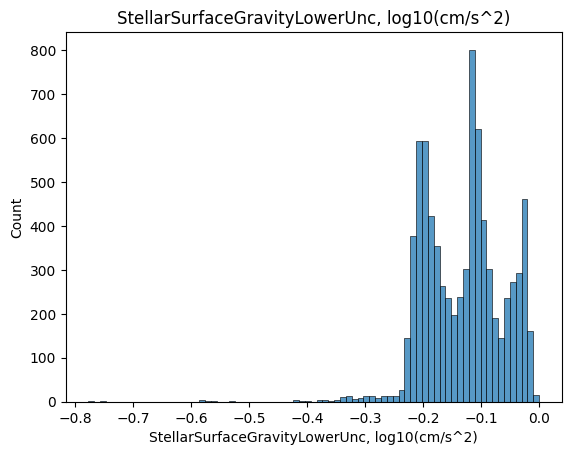

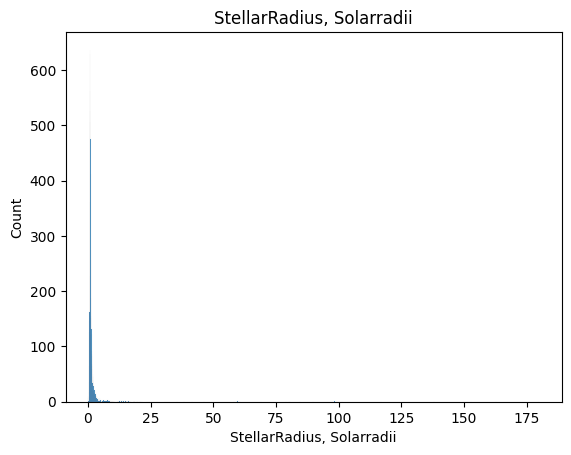

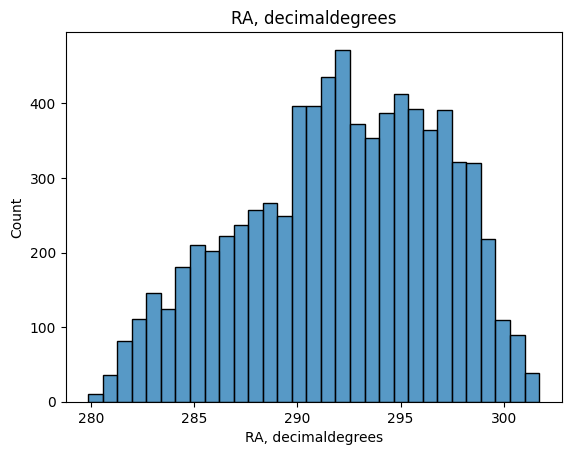

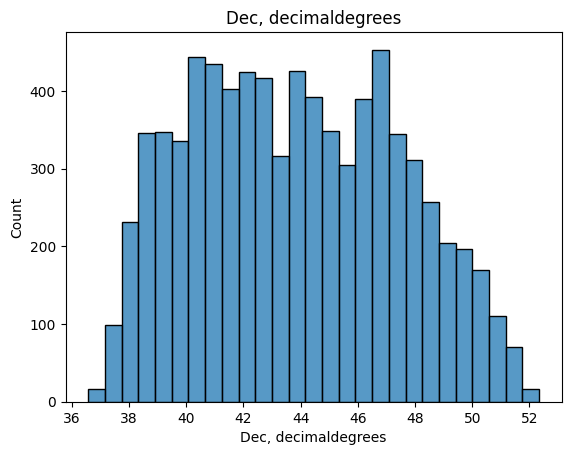

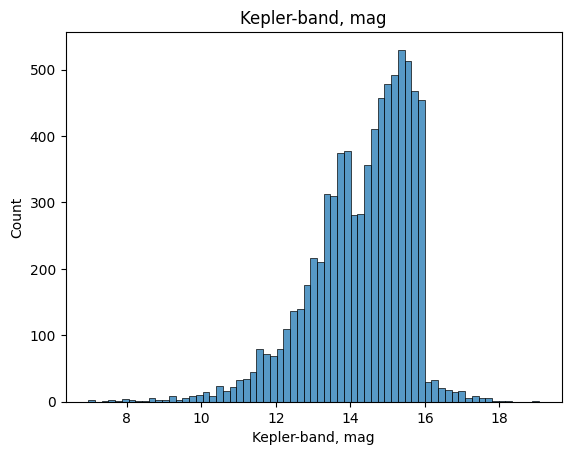

In [56]:
for i in features.select_dtypes(include=["float64"]):
    plt.figure()
    plt.title(f'{i}')
    sns.histplot(data=features[i])

#### Tasks continued
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant
-  Place `KeplerDispositionStatus` as the target and remove the following from the features: `DispositionScore`, `KeplerDispositionStatus`, `ArchiveDispositionStatus
- Consider scaling your (numeric) data
- You should now have two datasets, one with cleaned features and one with the target labels (1 for Candidate and 0 otherwise)

In [60]:
features_to_transform_log = [  'TransitEpochUpperUnc, BKJD',
                           'TransitDuration, hrs', 'TransitDurationUpperUnc, hrs',
                           'TransitDepth, ppm','TransitDepthUpperUnc, ppm','OrbitalPeriod, days',
                           'EquilibriumTemperature, K','TransitSignal-to-Noise', 
                           'StellarSurfaceGravityUpperUnc, log10(cm/s^2)',
                            'StellarRadius, Solarradii'
                           ]

features_to_transform_sqrt = [
    'StellarEffectiveTemperature, K'
]

feature_to_transform_exp = [
       'StellarSurfaceGravity, log10(cm/s^2)',
]

In [61]:
for feature in features_to_transform_log:
    #features[feature] = np.log(features[feature])
    features[feature].apply(lambda x: np.log(x))

for feature in features_to_transform_sqrt:
    #features[feature] = np.sqrt(features[feature])
    features[feature].apply(lambda x: np.sqrt(x))

for feature in feature_to_transform_exp:
    #features[feature] = np.exp(features[feature])
    features[feature].apply(lambda x: np.exp(x))

C:\Users\Lilian Bittar\AppData\Local\Temp\ipykernel_20420\2615929821.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


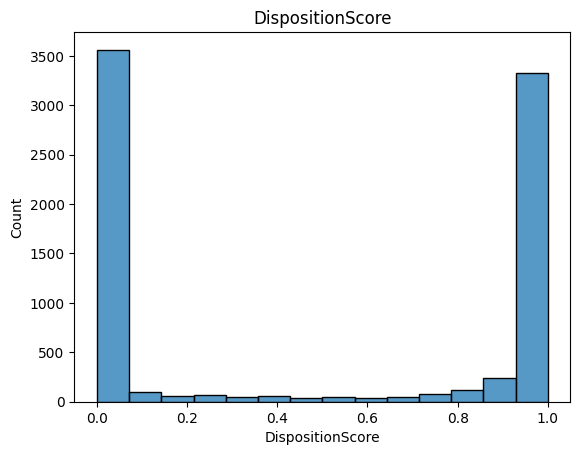

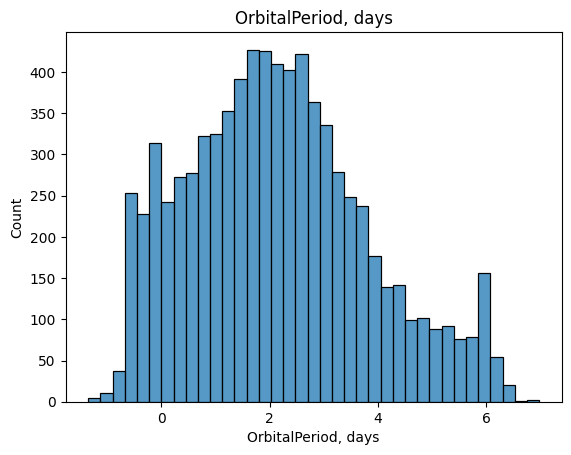

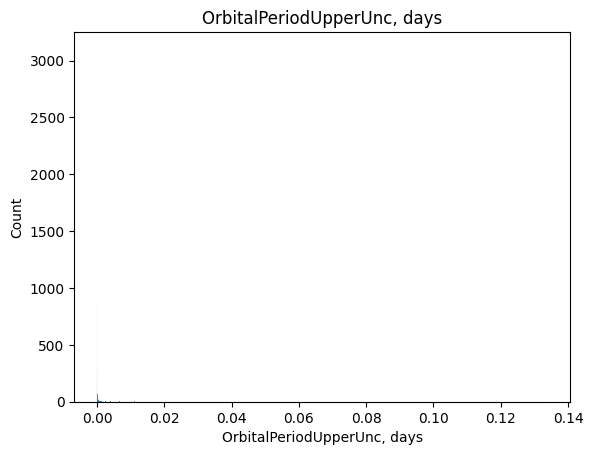

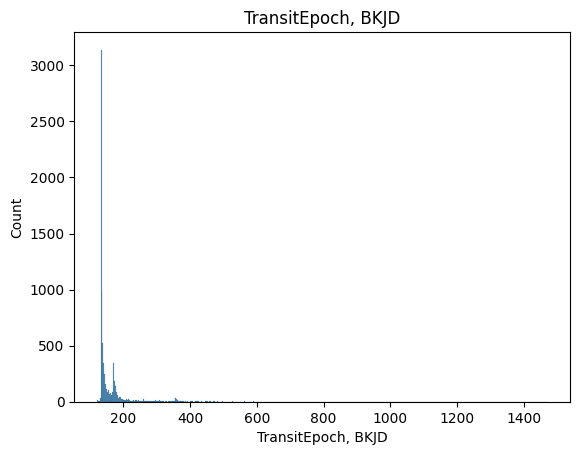

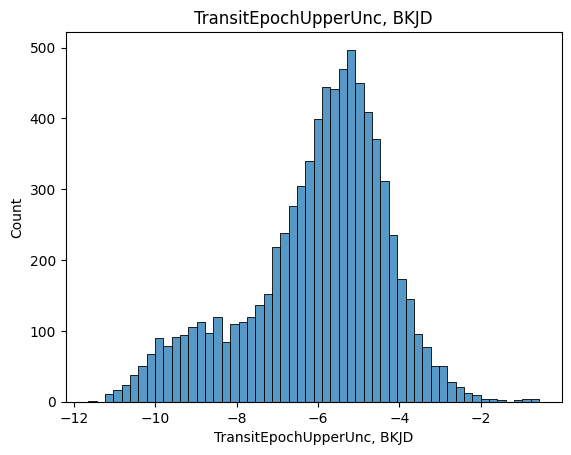

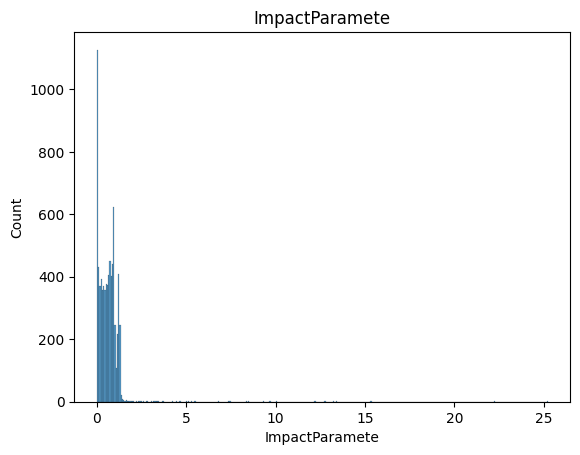

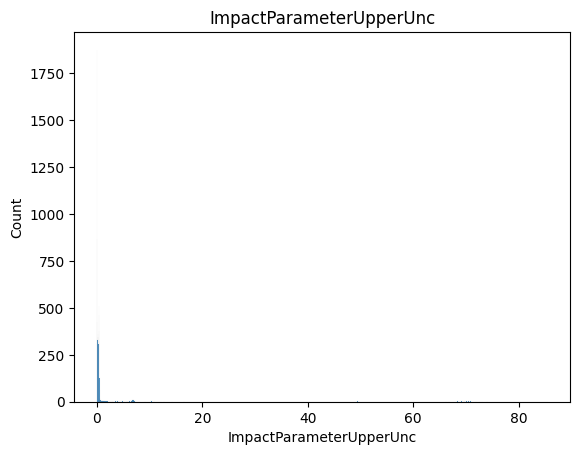

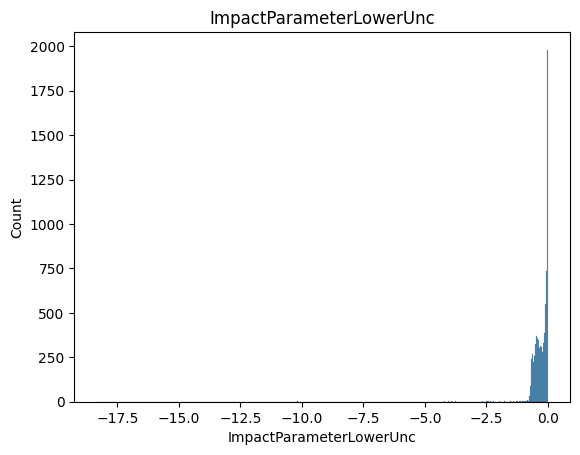

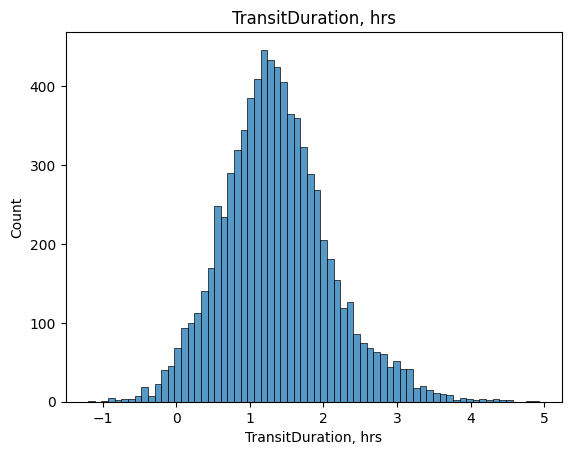

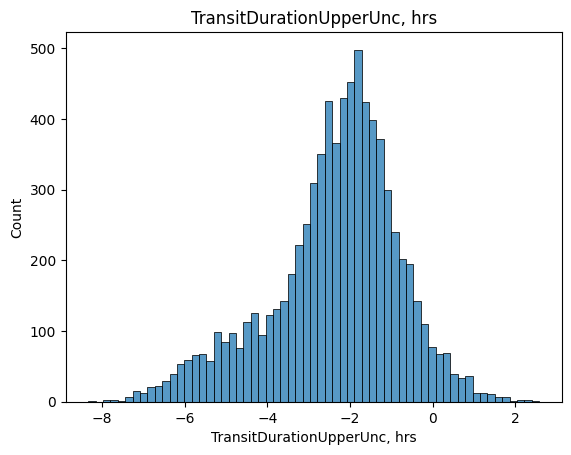

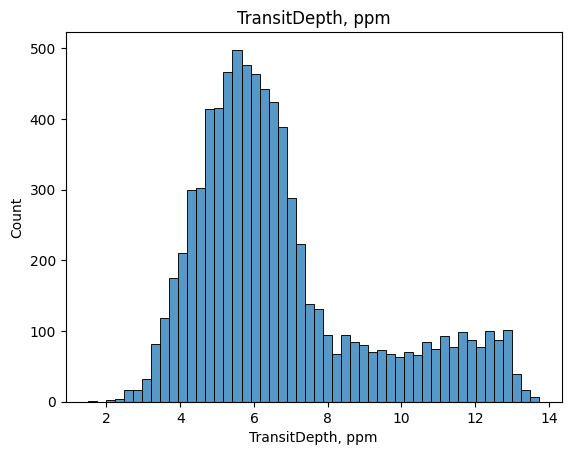

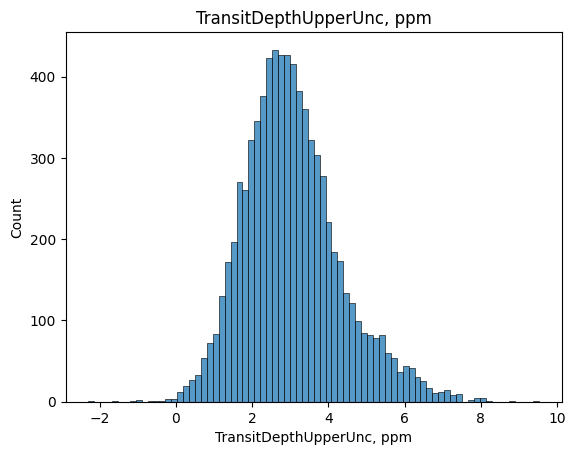

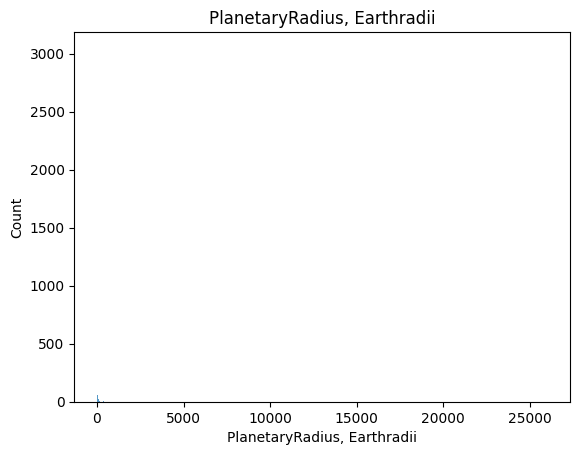

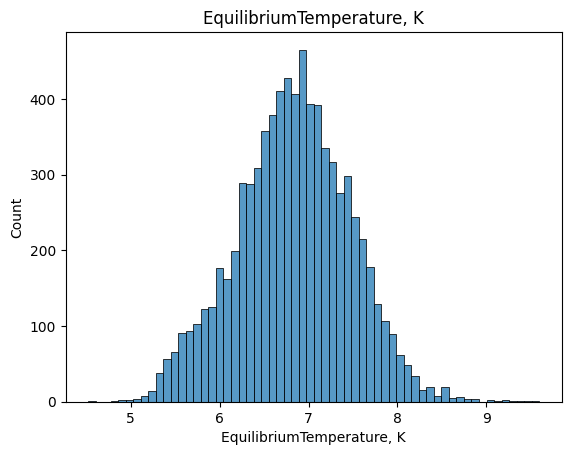

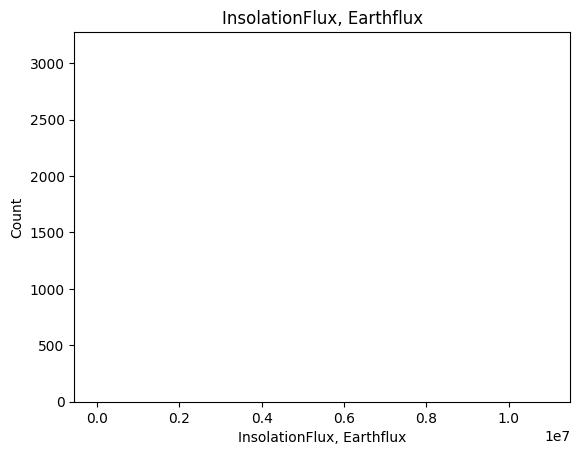

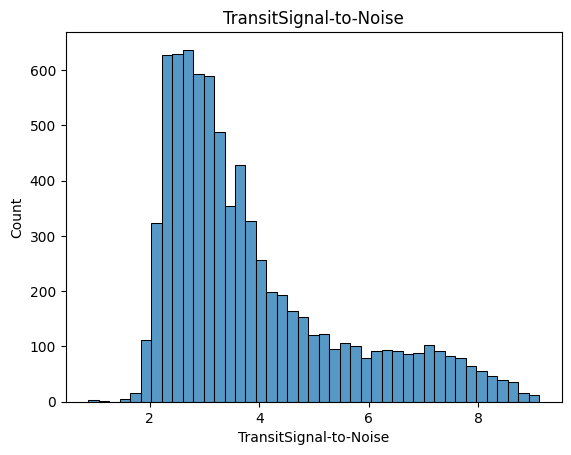

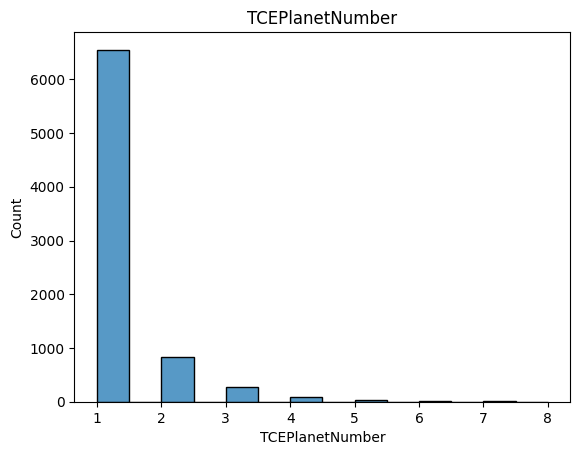

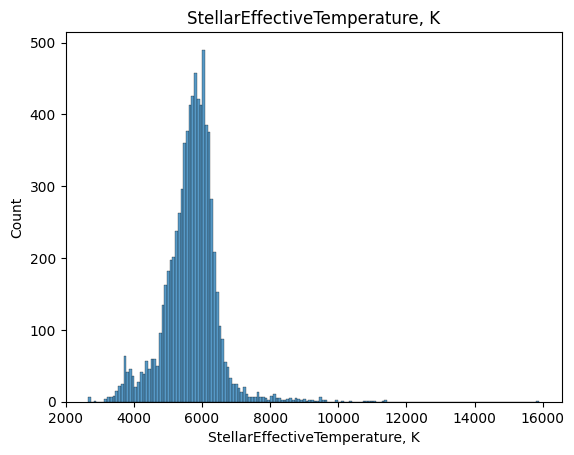

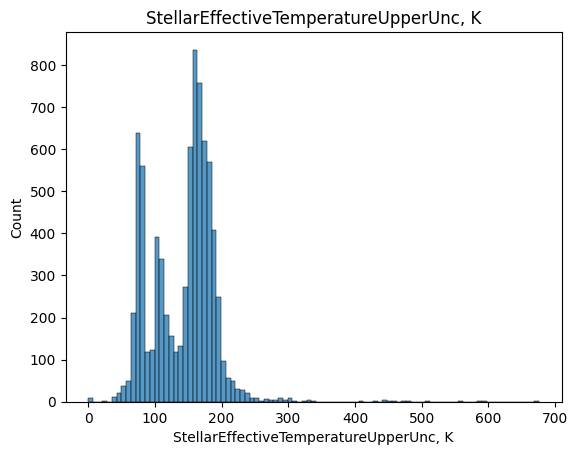

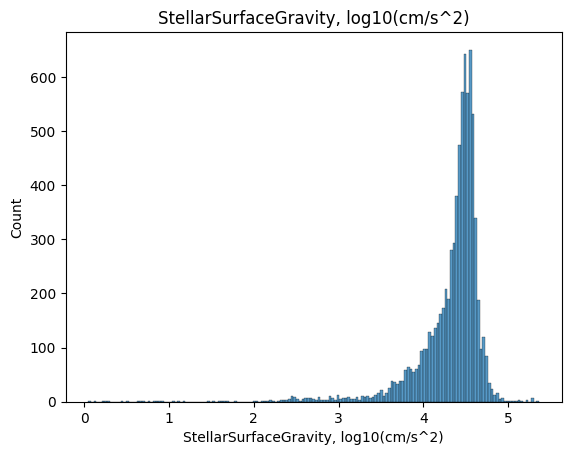

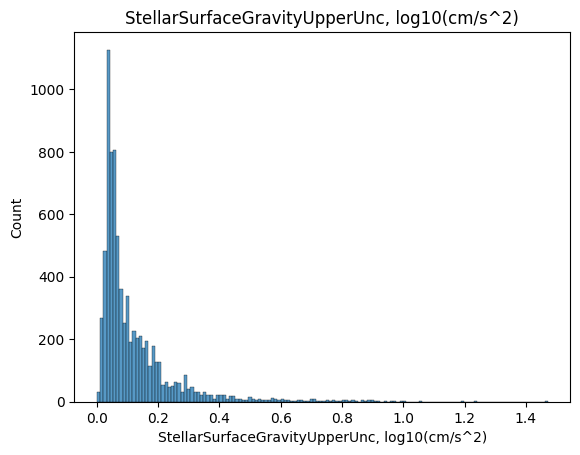

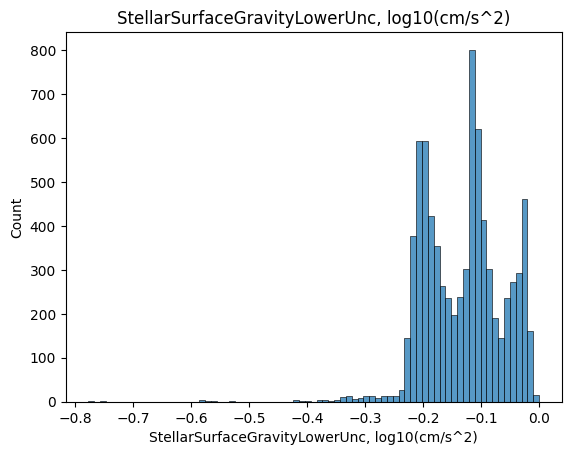

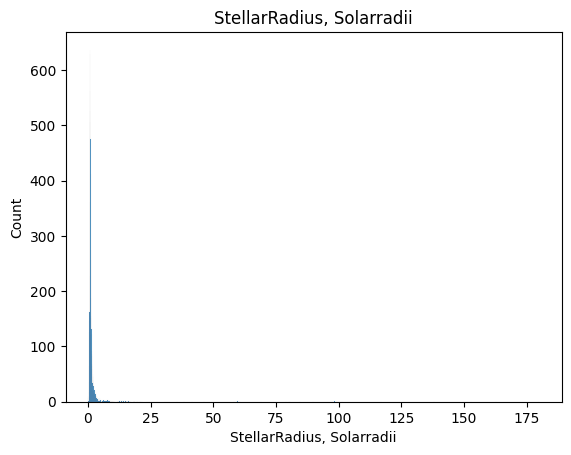

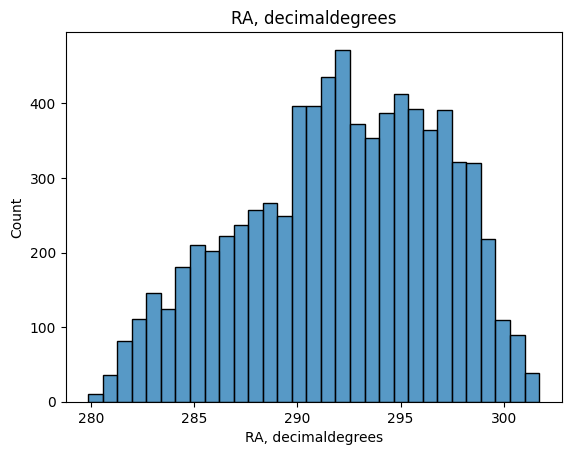

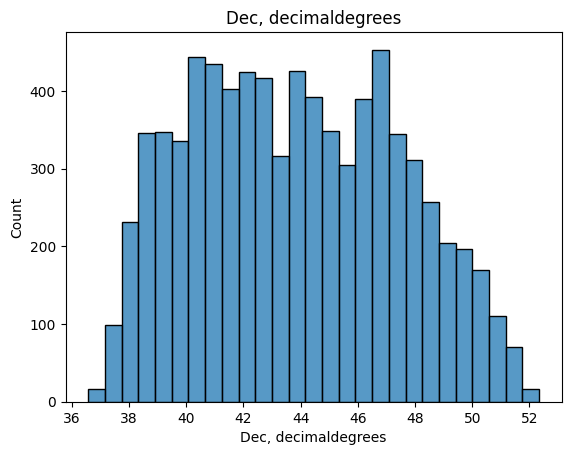

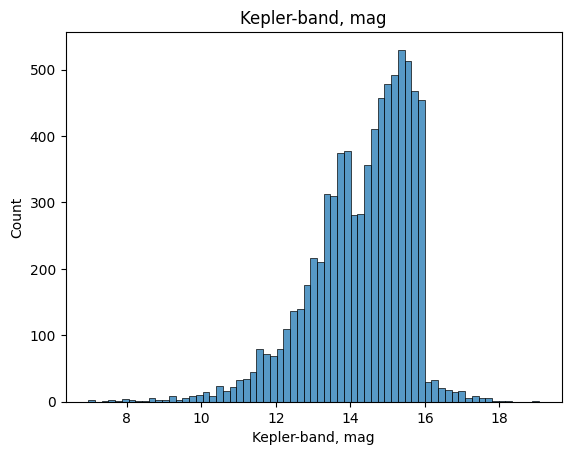

In [62]:
for i in features.select_dtypes(include=["float64"]):
    plt.figure()
    plt.title(f'{i}')
    sns.histplot(data=features[i])

,DispositionUsingKeplerData,ExoplanetArchiveDisposition
0,CANDIDATE,CONFIRMED
1,CANDIDATE,CONFIRMED
2,CANDIDATE,CANDIDATE
3,FALSE POSITIVE,FALSE POSITIVE
4,CANDIDATE,CONFIRMED
...,...,...
9559,FALSE POSITIVE,FALSE POSITIVE
9560,CANDIDATE,CANDIDATE
9561,FALSE POSITIVE,FALSE POSITIVE
9562,CANDIDATE,CANDIDATE


### 3+4. Train, Test, Validation, Cross Validation + Models
-  Consider which method to use to split the data and do the appropriate splits - if using CV still make a test set
-  Use claasification algorithms to train a model - which and how many is up to you

### 5. Evaluate
-  Write three functions:
     1. One that calculates accuracy, precision, recall, specificity, and f1-score
     2. One that outputs the confusion matrix
     3. One that diplays the precision-recall curve as well as the ROC-cruve
-  Use your newly written functions to evaluate your models using the test data created in (3+4)